# imports

Use this notebook to develop the model. See `run.py` for a running model. Use with care.

In [1]:
def fix_layout(width:int=95):
    from IPython.core.display import display, HTML
    display(HTML('<style>.container { width:' + str(width) + '% !important; }</style>'))
    
fix_layout()

In [2]:
import numpy as np

from itertools import combinations, product
    
from IPython.display import display

import preprocessing as pp
from functions import implementations as linear_models 
from functions.helpers import calculate_mse
# todo remove this from final run version
from utils.plots import plot_feature_importance
import utils.csv as ph

from utils.logs import enable_logging, logging
enable_logging(logging.DEBUG)

# do not use %pylab, that inserts packages into the namespace 
# %matplotlib inline

2018-11-05 11:47:10,471 - root - INFO - logs - logging enabled for level: 10
2018-11-05 11:47:10,476 - matplotlib.backends - DEBUG - __init__ - backend module://ipykernel.pylab.backend_inline version unknown


In [3]:
np.random.seed(42) # for reproductive results

# data loading & handling

- loading data
- clean data (replacing -999 with mean values)

In [4]:
y, X, X_indices = ph.load_csv_data('../data/train.csv')

In [5]:
with open('../data/train.csv', 'r') as f:
    csv_header = f.readline()

In [6]:
X_columns = [c.strip() for c in csv_header.split(',')[2:]]

# model fitting

- feature expansion (before or after the standardisation?)
- standardising
- train/test split
- feature selection
- creating models for each jet
- train each model

In [7]:
import models.LinearClassifier as LC
from importlib import reload
reload(LC)

<module 'models.LinearClassifier' from '/home/sam/proj/epfl/ml18/project1/src/models/LinearClassifier.py'>

In [ ]:
m.remove_highly_correlated_features_treshold

In [26]:
run_sanitiy_checks = True

base_parameters = {
    "merge_jet_2_3":  True, 
    "with_bias_column":  True,
    "with_feature_expansion":  False,
    "jets_column":  22,
    "remove_columns_with_many_undefined_values": True,
    "column_names": X_columns,
    "remove_highly_correlated_features_treshold": 0.96
}



if run_sanitiy_checks:
    sanity_simple_models = [LC.LinearClassifier(**{**base_parameters, **model}).fit(X, y) for model in linear_models._TEST_PARAMETERS_]

    for m in sanity_simple_models:
        print(m.base_model, m.model_evaluation)

2018-11-05 14:44:02,662 - root - INFO - LinearClassifier - fitting with: {'jets_column': 22, 'with_bias_column': True, 'with_feature_expansion': False, 'merge_jet_2_3': True, 'test_split_ratio': 0.33, 'with_oversampling': False, 'remove_highly_correlated_features': True, 'remove_highly_correlated_features_treshold': 0.96, 'base_model': 'least_squares_GD', 'with_feature_selection': False, 'lasso_lambda': 50, 'max_iters': 1000, 'gamma': 0.1, 'tol': 0.001, 'ridge_lambda': 0.0}
2018-11-05 14:44:02,833 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-05 14:44:03,494 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-05 14:44:03,598 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):2.0700821157339966e-17
2018-11-05 14:44:03,692 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-05 14:44:03,7

In [30]:
for m in sanity_simple_models:
    print(m.base_model, m.model_evaluation)

least_squares_GD {'train': 0.7351423498146891, 'test': 0.7360722369605958}
least_squares_SGD {'train': 0.7264913360053041, 'test': 0.7259605487812262}
least_squares {'train': 0.736599045346062, 'test': 0.7331674757281553}
ridge_regression {'train': 0.7076175716755081, 'test': 0.7130974097044874}
logistic_regression {'train': 0.7389859481558075, 'test': 0.7422331329890798}
reg_logistic_regression {'train': 0.7401928568868071, 'test': 0.7412432524025078}


2018-11-05 00:36:23,445 - root - INFO - LinearClassifier - fitting with: {'jets_column': 22, 'with_bias_column': True, 'with_feature_expansion': True, 'merge_jet_2_3': True, 'test_split_ratio': 0.33, 'with_oversampling': False, 'remove_highly_correlated_features': True, 'remove_highly_correlated_features_treshold': 0.9, 'base_model': 'ridge_regression', 'with_feature_selection': True, 'lasso_lambda': 50, 'max_iters': 1000, 'gamma': 1e-06, 'tol': 0.001, 'ridge_lambda': 1.0}
2018-11-05 00:36:23,611 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-05 00:36:24,332 - root - DEBUG - LinearClassifier - feature selection through correlation removed 6 features
2018-11-05 00:36:29,047 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-2.3288992435064772e-11
2018-11-05 00:36:29,666 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-05 00:36:31,4

{'train': 0.7388749552131852, 'test': 0.7357765931669493}


2018-11-05 00:37:17,468 - matplotlib.font_manager - DEBUG - font_manager - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/share/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


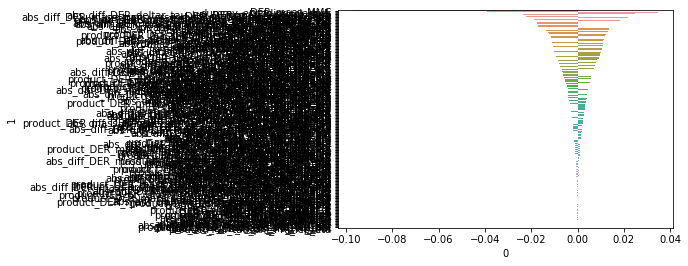

In [13]:
if run_sanitiy_checks:
    clf_parameters = {"merge_jet_2_3": True, 
                      "jets_column":  22,
                      "with_bias_column": True,
                      "with_feature_expansion": True,
                      "with_feature_selection": True,
                      "lasso_lambda": 50,
                      "column_names": X_columns
                     }

    clf = LC.LinearClassifier(**clf_parameters).fit(X, y)

    print(clf.model_evaluation)
    plot_feature_importance(clf)

# Multi model

In [9]:
from models import MultiClassifierModel as MCM
reload(LC)
reload(MCM)

<module 'models.MultiClassifierModel' from '/home/sam/proj/epfl/ml18/project1/src/models/MultiClassifierModel.py'>

In [11]:
if run_sanitiy_checks:
    mclf = MCM.MultiClassifierModel(LC.LinearClassifier, **{**base_parameters, **{'with_oversampling': True}}).fit(X, y)
    print(mclf.model_evaluation['test'])

    mclf = MCM.MultiClassifierModel(LC.LinearClassifier, **base_parameters).fit(X, y)
    print(mclf.model_evaluation['test'])
    
    mclf = MCM.MultiClassifierModel(LC.LinearClassifier, **{**base_parameters, **{'remove_columns_with_many_undefined_values': False}}).fit(X, y)
    print(mclf.model_evaluation['test'])

2018-11-05 00:35:31,557 - root - INFO - LinearClassifier - fitting with: {'jets_column': 22, 'with_bias_column': True, 'with_feature_expansion': False, 'merge_jet_2_3': True, 'test_split_ratio': 0.33, 'with_oversampling': True, 'remove_highly_correlated_features': True, 'remove_highly_correlated_features_treshold': 0.9, 'base_model': 'ridge_regression', 'with_feature_selection': False, 'lasso_lambda': 50, 'max_iters': 1000, 'gamma': 1e-06, 'tol': 0.001, 'ridge_lambda': 1.0}
2018-11-05 00:35:31,610 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
/home/sam/.local/bin/miniconda3/envs/sci/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/sam/.local/bin/miniconda3/envs/sci/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
2018-11-05 00:35:31,992

0.702354685762044


2018-11-05 00:35:33,853 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-05 00:35:33,941 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):2.662124489993958e-17
2018-11-05 00:35:33,964 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-05 00:35:33,980 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0023916276036890934
2018-11-05 00:35:33,991 - root - DEBUG - implementations - ridge_regression: lambda = 1.0.

2018-11-05 00:35:34,038 - root - INFO - LinearClassifier - fitting with: {'jets_column': 22, 'with_bias_column': True, 'with_feature_expansion': False, 'merge_jet_2_3': True, 'test_split_ratio': 0.33, 'with_oversampling': False, 'remove_highly_correlated_features': True, 'remove_highly_correlated_features_treshold': 0.9, 'base_model': 'ridge_regression', 'with_feature_selection': False, 'lasso_lambda': 50, 'max_iters': 100

0.7301758161861917


2018-11-05 00:35:35,983 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-05 00:35:36,056 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):1.7485197000941552e-17
2018-11-05 00:35:36,103 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0006843276503962964
2018-11-05 00:35:36,111 - root - DEBUG - implementations - ridge_regression: lambda = 1.0.

2018-11-05 00:35:36,144 - root - INFO - LinearClassifier - fitting with: {'jets_column': 22, 'with_bias_column': True, 'with_feature_expansion': False, 'merge_jet_2_3': True, 'test_split_ratio': 0.33, 'with_oversampling': False, 'remove_highly_correlated_features': True, 'remove_highly_correlated_features_treshold': 0.9, 'base_model': 'ridge_regression', 'with_feature_selection': False, 'lasso_lambda': 50, 'max_iters': 1000, 'gamma': 1e-06, 'tol': 0.001, 'ridge_lambda': 1.0}
2018-11-05 00:35:36,603 - root - DEBUG - LinearClassifier - feature selection 

0.7323426683431042


In [10]:
final_model_params = {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'column_names': ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'], 'jets_column': 22, 'with_oversampling': False, 'lasso_lambda': 0.001, 'merge_jet_2_3': True, 'with_bias_column': True}

clf = MCM.MultiClassifierModel(**final_model_params).fit(X, y)

2018-11-05 12:28:04,531 - root - INFO - LinearClassifier - fitting with: {'jets_column': 22, 'with_bias_column': True, 'with_feature_expansion': True, 'merge_jet_2_3': True, 'test_split_ratio': 0.33, 'with_oversampling': False, 'remove_highly_correlated_features': True, 'remove_highly_correlated_features_treshold': 0.8, 'base_model': 'ridge_regression', 'with_feature_selection': False, 'lasso_lambda': 0.001, 'max_iters': 1000, 'gamma': 1e-06, 'tol': 0.001, 'ridge_lambda': 1e-10}
2018-11-05 12:28:04,609 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
/home/sam/.local/bin/miniconda3/envs/sci/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/sam/.local/bin/miniconda3/envs/sci/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
2018-11-05 12:28:0

In [11]:
np.mean([len(m.model) for m in clf.models.values()])

529.0

In [12]:
import pandas as pd
feature_importances = pd.DataFrame(columns=['column'])
for jet, m in clf.models.items():
    feature_importance = list(zip(np.abs(m.model), m.column_names))
    feature_importances = feature_importances.merge(pd.DataFrame(sorted(feature_importance, key=lambda x: abs(x[0]), reverse=True), columns=['feature_importance_{}'.format(jet), 'column']), on='column', how='outer')

In [13]:
feature_importances['mean'] = feature_importances[[c for c in feature_importances.columns if c != 'column']].mean(axis=1)
feature_importances = feature_importances.sort_values('mean', ascending=False)
feature_importances['mean_pct'] = np.cumsum(feature_importances['mean']) / feature_importances['mean'].sum()
plt_data = feature_importances[feature_importances['mean_pct'] < 0.5]

In [14]:
import seaborn as sns

sns.set_palette(sns.color_palette("BuGn_r"))

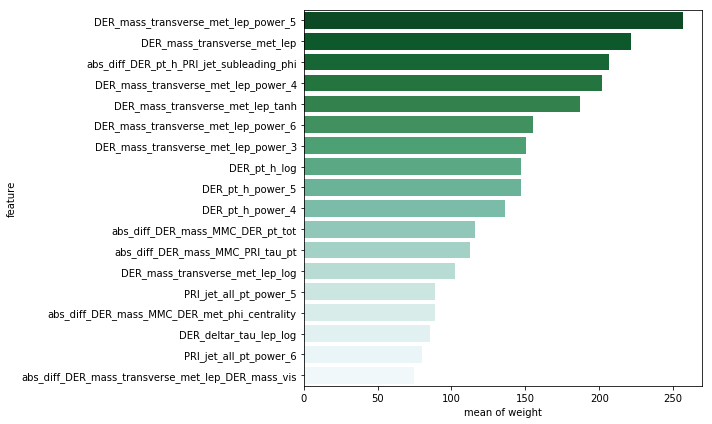

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='mean', y='column', data=plt_data, palette=sns.color_palette("BuGn_r", n_colors=plt_data.shape[0]))
ax.set(xlabel='mean of weight', ylabel='feature')
plt.tight_layout()
ax.figure.savefig('../report/plots/feature_importance.eps')

In [ ]:
def plot_feature_importance_multi(clf):


# Grid Search

In [29]:
run_sanitiy_checks = False
if run_sanitiy_checks:
    grid_search_parameters = {
        'lasso_lambda': np.logspace(1, 3, 1),
        'ridge_lambda': np.logspace(-10, -3, 2)
    }
else:
    grid_search_parameters= {
        'lasso_lambda': np.logspace(-3, 3, 10),
        'ridge_lambda': np.logspace(-10, 1, 10),
        'merge_jet_2_3': [True, False],
        'remove_highly_correlated_features_treshold': np.linspace(0.8, 0.9, 2)
    }

base_parameters = {
    #"merge_jet_2_3": True, 
    "with_bias_column": True,
    "with_feature_expansion": True,
    "jets_column":  22,
    "column_names": X_columns,
    "with_oversampling": False,
}

In [30]:
import utils.grid_search as gs
from importlib import reload
reload(gs)
reload(MCM)

grid_search_results = gs.grid_search_parallel(MCM.MultiClassifierModel, base_parameters=base_parameters, 
                     grid_search_parameters=grid_search_parameters,
                     X=X,
                     y=y)

testing 400 models! make sure that you have the power to run this!


2018-11-04 18:22:40,715 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.001, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:22:40,742 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
/home/sam/.local/opt/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/sam/.local/opt/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/sam/proj/epf

2018-11-04 18:22:42,849 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:22:42,886 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.3778993740436243e-05
/home/sam/.local/opt/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/sam/.local/opt/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
2018-11-04 18:22:42,980 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.5994842503189421, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 2.154434690031882, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_f

2018-11-04 18:22:47,369 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:22:47,450 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:22:47,457 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:22:47,518 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:22:47,626 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 4.641588833612782e-07, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 2.154434690031882, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_

2018-11-04 18:22:52,640 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:22:52,715 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0014986325315433796
2018-11-04 18:22:52,814 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.00012915496650148855, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.001, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:22:52,856 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):1.399597678601306e-11
2018-11-04 18:22:52,841 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
20


2018-11-04 18:22:57,157 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:22:57,317 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:22:57,340 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.004470847973320182
2018-11-04 18:22:57,425 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1.6681005372000556e-09, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 2.154434690031882, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:22:57,440 - root - DEBUG - implementations - ridge_regression: lambda = 0.0001291549665014

2018-11-04 18:23:01,337 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:23:01,379 - root - DEBUG - implementations - ridge_regression: lambda = 0.0359381366380464.

2018-11-04 18:23:01,560 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.00012915496650148855, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.001, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:23:01,678 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:23:01,836 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-4.343807446147841e-11
2018-1

2018-11-04 18:23:05,154 - root - DEBUG - implementations - ridge_regression: lambda = 0.0359381366380464.

2018-11-04 18:23:05,157 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:23:05,533 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-4.343807446147841e-11
2018-11-04 18:23:05,662 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:23:05,682 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.0359381366380464, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.001, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:23:05,712 - r


2018-11-04 18:23:09,953 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:23:10,182 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-4.343807446147841e-11
2018-11-04 18:23:10,304 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 4.641588833612782e-07, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 2.154434690031882, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:23:10,339 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:23:10,447 - root - DEBUG - LinearClassifier - feature selection through correlation remo

2018-11-04 18:23:13,963 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:23:14,048 - root - DEBUG - LinearClassifier - feature selection through correlation removed 8 features
2018-11-04 18:23:14,074 - root - DEBUG - implementations - ridge_regression: lambda = 1e-10.

2018-11-04 18:23:14,257 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:23:14,506 - root - DEBUG - LinearClassifier - feature selection through correlation removed 8 features
2018-11-04 18:23:14,606 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.001, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-0

2018-11-04 18:23:18,197 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.002154434690031887, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 2.154434690031882, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:23:18,213 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:23:18,458 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.00012915496650148855, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.001, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remo

2018-11-04 18:23:22,980 - root - DEBUG - implementations - ridge_regression: lambda = 1e-10.
2018-11-04 18:23:22,989 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:23:22,994 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0013898270872904162

2018-11-04 18:23:23,005 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0025789325412603017
2018-11-04 18:23:23,062 - root - DEBUG - implementations - ridge_regression: lambda = 2.782559402207126e-08.

2018-11-04 18:23:23,171 - root - DEBUG - implementations - ridge_regression: lambda = 0.0359381366380464.

2018-11-04 18:23:23,342 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.004641588833612777, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column':

2018-11-04 18:23:27,010 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:23:27,025 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:23:27,132 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0013898270872904162
2018-11-04 18:23:27,146 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:23:27,195 - root - DEBUG - implementations - ridge_regression: lambda = 0.0359381366380464.

2018-11-04 18:23:27,218 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1470482509543395e-05
2018-11-04 18:23:27,302 - root - DEBUG - LinearClassifier - feature selection through correlation removed 7 features
2018-11-04 18:23:27,344 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-4.796062670472978e-15
2018-11-04 18:23:27,400 - root - DEBUG - LinearClassifier -

2018-11-04 18:23:31,708 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.44634241202594e-06
2018-11-04 18:23:31,801 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:23:31,918 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0014417211327435904
2018-11-04 18:23:31,931 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:23:32,047 - root - DEBUG - implementations - ridge_regression: lambda = 4.641588833612782e-07.

2018-11-04 18:23:32,152 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0032977971578293705
2018-11-04 18:23:32,243 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.

2018-11-04 18:23:32,351 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.3171024834341387e-05
2018-11-04 18:23:32,440 - root - DEBUG - LinearC

2018-11-04 18:23:35,878 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:23:35,874 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:23:35,922 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.004641588833612777, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:23:35,998 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:23:36,083 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.236791939245866e-09

2018-11-04 18:23:39,769 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:23:39,766 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:23:39,899 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.002660929397502555
2018-11-04 18:23:39,947 - root - DEBUG - implementations - ridge_regression: lambda = 0.002154434690031887.

2018-11-04 18:23:40,002 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.002660929397502555
2018-11-04 18:23:40,018 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:23:40,076 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.

2018-11-04 18:23:40,143 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-6.582480595707704e-06
2018-11-04 18:23:40,294 - root - INFO - LinearClassifier - fitting

2018-11-04 18:23:44,965 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.002154434690031887, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 10.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:23:45,009 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:23:45,013 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.

2018-11-04 18:23:45,228 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.002721388635984998
2018-11-04 18:23:45,294 - root - DEBUG - implementations - ridge_regression: lambda = 2.782559402207126e-08.

2018-11-04 18:23:45,326 - root -

2018-11-04 18:23:49,114 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):2.5329036219040794e-12
2018-11-04 18:23:49,134 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:23:49,169 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.142102852769157e-05
2018-11-04 18:23:49,241 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:23:49,313 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:23:49,308 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:23:49,422 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 4.641588833612782e-07, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 10.0, 'jets_column': 2

2018-11-04 18:23:52,857 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1149944531622743e-05
2018-11-04 18:23:52,874 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 2.782559402207126e-08, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.004641588833612777, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:23:52,928 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:23:52,990 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:23:53,030 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undef

2018-11-04 18:23:56,801 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:23:56,805 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):2.5329036219040794e-12
2018-11-04 18:23:56,840 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:23:56,834 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.3265341800907862e-05
2018-11-04 18:23:56,854 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.0359381366380464, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.004641588833612777, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
20

2018-11-04 18:24:01,149 - root - DEBUG - implementations - ridge_regression: lambda = 1.6681005372000556e-09.

2018-11-04 18:24:01,340 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1706178620959279e-05
2018-11-04 18:24:01,446 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:24:01,538 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.5994842503189421, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 10.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:24:01,562 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0008010562468776315
2018-11-04 18:24:01,586 - root - DEBUG - 

2018-11-04 18:24:05,737 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0007419624607326787
2018-11-04 18:24:05,858 - root - DEBUG - implementations - ridge_regression: lambda = 4.641588833612782e-07.
2018-11-04 18:24:05,860 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left

2018-11-04 18:24:05,913 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:24:05,976 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.001295957217168396
2018-11-04 18:24:06,040 - root - DEBUG - implementations - ridge_regression: lambda = 1.6681005372000556e-09.

2018-11-04 18:24:06,468 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-4.2183575266675867e-13
2018-11-04 18:24:06,495 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1.6681005372000556e-09, 'with_feature_expansion': True, 'remove_highly_corre

2018-11-04 18:24:09,421 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.

2018-11-04 18:24:09,446 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-8.193750577478356e-10
2018-11-04 18:24:09,434 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:24:09,512 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:24:09,621 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:24:09,768 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.00012915496650148855, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.021544346900318832, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated

2018-11-04 18:24:13,630 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features

2018-11-04 18:24:13,650 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-8.193750577478356e-10
2018-11-04 18:24:13,835 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:24:13,911 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.021544346900318832, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:24:14,006 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are lef

2018-11-04 18:24:17,523 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:24:17,575 - root - DEBUG - implementations - ridge_regression: lambda = 0.0359381366380464.

2018-11-04 18:24:17,752 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-4.2183575266675867e-13
2018-11-04 18:24:17,882 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:24:17,962 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.001195196981327842
2018-11-04 18:24:17,960 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.0359381366380464, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.021544346900318832, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features

2018-11-04 18:24:21,561 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:24:21,610 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:24:22,177 - root - DEBUG - LinearClassifier - feature selection through correlation removed 8 features
2018-11-04 18:24:22,221 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1699639160136431e-05
2018-11-04 18:24:22,260 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:24:22,335 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-4.2183575266675867e-13
2018-11-04 18:24:22,461 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:24:22,535 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are le

2018-11-04 18:24:26,917 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:24:27,074 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.002154434690031887, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 46.41588833612773, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:24:27,109 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:24:27,299 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0003914058422626718
2018-11-04 18:24:27,345 - root - DEBUG - implementations - ridge_regression: lambda = 1.6681005372000556e-0

2018-11-04 18:24:30,899 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:24:30,932 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:24:31,047 - root - DEBUG - LinearClassifier - feature selection through correlation removed 8 features
2018-11-04 18:24:31,032 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-7.519044609853681e-10
2018-11-04 18:24:31,203 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:24:31,272 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.557259023003621e-06
2018-11-04 18:24:31,301 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:24:31,375 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:24

2018-11-04 18:24:34,731 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:24:34,785 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.100999482367727e-05
2018-11-04 18:24:34,835 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:24:35,064 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:24:35,147 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0003914058422626718
2018-11-04 18:24:35,184 - root - DEBUG - implementations - ridge_regression: lambda = 0.002154434690031887.

2018-11-04 18:24:35,266 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:24:35,584 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.002154434690031887, 'with_feature_expansion': True, 'remove_highly

2018-11-04 18:24:38,711 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:24:38,952 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:24:39,106 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.170743807232331e-05
2018-11-04 18:24:39,257 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:24:39,281 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:24:39,401 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:24:39,491 - root - DEBUG - LinearClassifier - feature selection through correlation removed 7 features
2018-11-04 18:24:39,951 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):5.008209272518608e-12
2018-11-04 18:2

2018-11-04 18:24:43,564 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:24:43,688 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0009076126162586256
2018-11-04 18:24:43,834 - root - DEBUG - implementations - ridge_regression: lambda = 1e-10.

2018-11-04 18:24:43,989 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1.6681005372000556e-09, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 215.44346900318823, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:24:43,998 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04

2018-11-04 18:24:48,133 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:24:48,429 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.1, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:24:48,445 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:24:48,772 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 2.782559402207126e-08, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.021544346900318832, 'jets_column': 22,

2018-11-04 18:24:52,582 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 4.641588833612782e-07, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 215.44346900318823, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:24:52,611 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:24:52,623 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1.6681005372000556e-09, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 215.44346900318823, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol


2018-11-04 18:24:56,378 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.469251382048505e-06
2018-11-04 18:24:56,557 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.1, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:24:56,568 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:24:56,565 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:24:56,599 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left

2018-11-04 18:25:01,277 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:25:01,290 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):7.184995765575629
2018-11-04 18:25:01,486 - root - DEBUG - implementations - ridge_regression: lambda = 0.5994842503189421.

2018-11-04 18:25:01,546 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):8.796845766663802e-12
2018-11-04 18:25:01,604 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.1, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:25:01,645 - root - DEBUG - LinearCla

2018-11-04 18:25:05,040 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:25:05,103 - root - DEBUG - LinearClassifier - feature selection through correlation removed 8 features
2018-11-04 18:25:05,157 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:25:05,445 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.003148502509621784
2018-11-04 18:25:05,473 - root - DEBUG - implementations - ridge_regression: lambda = 1.6681005372000556e-09.

2018-11-04 18:25:05,718 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0014588921053016147
2018-11-04 18:25:05,787 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1.6681005372000556e-09, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 1000.0, 'jets_column': 22, 'with_oversampling': False, 'max_ite


2018-11-04 18:25:09,785 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.46415888336127775, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:25:09,795 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):8.796845766663802e-12
2018-11-04 18:25:09,886 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:25:09,915 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:25:10,001 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2

2018-11-04 18:25:13,836 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 2.782559402207126e-08, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.1, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:25:13,851 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.468789676502682e-06

2018-11-04 18:25:13,922 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.003148502509621784
2018-11-04 18:25:13,933 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:25:13,965 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.

2018-11-04 18:25:14,126 

2018-11-04 18:25:18,125 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:25:18,387 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:25:18,496 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.0359381366380464, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.1, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:25:18,502 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.005382025139309512
2018-11-04 18:25:18,557 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-1

2018-11-04 18:25:23,008 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:25:23,000 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-5.216989480243016e-12
2018-11-04 18:25:23,135 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0020442029045544697
2018-11-04 18:25:23,279 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:25:23,275 - root - DEBUG - implementations - ridge_regression: lambda = 0.5994842503189421.

2018-11-04 18:25:23,456 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.00037827677173739814
2018-11-04 18:25:23,511 - root - DEBUG - implementations - ridge_regression: lambda = 2.782559402207126e-08.

2018-11-04 18:25:23,524 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-2.16628763786122e-12
2018-11-04 18:25:23,732 - root - DEBUG - LinearClass

2018-11-04 18:25:26,553 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:25:26,677 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1.6681005372000556e-09, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 1000.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:25:26,745 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:25:27,469 - root - DEBUG - LinearClassifier - feature selection through correlation removed 8 features
2018-11-04 18:25:27,472 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 featu

2018-11-04 18:25:31,439 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.315936783536788e-05
2018-11-04 18:25:31,446 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 2.782559402207126e-08, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.1, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:25:31,464 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:25:31,493 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):7.035553045003161
2018-11-04 18:25:31,555 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11

2018-11-04 18:25:35,049 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:25:35,195 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:25:35,445 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0026289100629362403
2018-11-04 18:25:35,500 - root - DEBUG - implementations - ridge_regression: lambda = 0.5994842503189421.

2018-11-04 18:25:35,547 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 4.641588833612782e-07, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 1000.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:25:35,593 -

2018-11-04 18:25:39,812 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:25:39,825 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):7.035553045003161
2018-11-04 18:25:39,853 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.46415888336127775, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:25:39,876 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:25:39,916 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.

2018-11-04 1

2018-11-04 18:25:44,552 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:25:44,655 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.00037095849478320763
2018-11-04 18:25:44,703 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.46415888336127775, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:25:44,734 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.
2018-11-04 18:25:44,738 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left

2018-11

2018-11-04 18:25:48,127 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-2.179635413004772e-11
2018-11-04 18:25:48,232 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:25:48,288 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:25:48,453 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:25:48,786 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:25:48,991 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-5.216989480243016e-12
2018-11-04 18:25:49,013 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0013472415227638536
2018-11-04 18:25:49,033 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-2.179635413004772e-11
2018-11-04 18:25:49,082 - root - DEBUG - implement

2018-11-04 18:25:52,544 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:25:52,579 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:25:52,593 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:25:52,597 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.002154434690031887, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.001, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:25:52,698 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefin


2018-11-04 18:25:58,013 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0005034656575326897
2018-11-04 18:25:58,019 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.00012915496650148855, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 2.154434690031882, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:25:58,111 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:25:58,162 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.09038546035093303
2018-11-04 18:25:58,181 - root - DEBUG - implementations - ridge_regression: lambda = 1e-10.

2018-11-04 18:25:58,351 - roo

2018-11-04 18:26:02,077 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-6.8146234328346665e-06
2018-11-04 18:26:02,266 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-7.1644678731758035e-12
2018-11-04 18:26:02,390 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:26:02,510 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.465844183743812e-06
2018-11-04 18:26:02,538 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:26:02,632 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:26:02,702 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0024964179440233026
2018-11-04 18:26:02,730 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.465844183743812e-06
2018-11-04 18:2

2018-11-04 18:26:06,926 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 2.154434690031882, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:26:06,941 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.465844183743812e-06
2018-11-04 18:26:06,996 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:26:07,214 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:26:07,245 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-3.641177833391385e-11
2

2018-11-04 18:26:11,379 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.481549234033443e-06
2018-11-04 18:26:11,486 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:26:11,496 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.002727933809663351
2018-11-04 18:26:11,552 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.

2018-11-04 18:26:11,605 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:26:11,618 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.481549234033443e-06
2018-11-04 18:26:11,856 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.002154434690031887, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.001, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge

2018-11-04 18:26:15,354 - root - DEBUG - implementations - ridge_regression: lambda = 2.782559402207126e-08.

2018-11-04 18:26:15,499 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:26:15,748 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:26:15,967 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:26:16,247 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 2.782559402207126e-08, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.46415888336127775, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-

2018-11-04 18:26:20,312 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:26:20,312 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):8.796954710204568
2018-11-04 18:26:20,373 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0028041674612703338
2018-11-04 18:26:20,421 - root - DEBUG - implementations - ridge_regression: lambda = 0.002154434690031887.

2018-11-04 18:26:20,425 - root - DEBUG - implementations - ridge_regression: lambda = 4.641588833612782e-07.

2018-11-04 18:26:20,555 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:26:20,975 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.002154434690031887, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.001, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': Fals

2018-11-04 18:26:25,108 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):1.9820883271993322e-12
2018-11-04 18:26:25,179 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0028041674612703338
2018-11-04 18:26:25,216 - root - DEBUG - implementations - ridge_regression: lambda = 0.0359381366380464.

2018-11-04 18:26:25,254 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:26:25,321 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0012323512401357579
2018-11-04 18:26:25,359 - root - DEBUG - implementations - ridge_regression: lambda = 1e-10.

2018-11-04 18:26:25,447 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.09038546035093303
2018-11-04 18:26:25,522 - root - DEBUG - implementations - ridge_regression: lambda = 2.782559402207126e-08.

2018-11-04 18:26:25,549 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0

2018-11-04 18:26:28,919 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1494317587231064e-05
2018-11-04 18:26:29,013 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1715777016847283e-05
2018-11-04 18:26:29,014 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:26:29,197 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:26:29,403 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.001750019847716298
2018-11-04 18:26:29,452 - root - DEBUG - implementations - ridge_regression: lambda = 1.6681005372000556e-09.

2018-11-04 18:26:29,552 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:26:29,883 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:26:29,974 - root - DEBU

2018-11-04 18:26:33,574 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0005034656575326897
2018-11-04 18:26:33,631 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.002154434690031887, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.001, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:26:33,654 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:26:33,663 - root - DEBUG - implementations - ridge_regression: lambda = 10.0.

2018-11-04 18:26:33,763 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:26:34,016 - root - DEBUG - 

2018-11-04 18:26:37,646 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):9.245080624532998
2018-11-04 18:26:37,762 - root - DEBUG - LinearClassifier - feature selection through correlation removed 8 features
2018-11-04 18:26:37,784 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.

2018-11-04 18:26:37,975 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-3.641177833391385e-11
2018-11-04 18:26:38,049 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.3233479876880154e-05
2018-11-04 18:26:38,134 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:26:38,148 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.00012915496650148855, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 10.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_j


2018-11-04 18:26:42,044 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.002727933809663351
2018-11-04 18:26:42,093 - root - DEBUG - implementations - ridge_regression: lambda = 10.0.
2018-11-04 18:26:42,115 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-2.4665521694677104e-05

2018-11-04 18:26:42,250 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.

2018-11-04 18:26:42,264 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:26:42,391 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:26:42,477 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.004488016741467738
2018-11-04 18:26:42,508 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.002154434690031887, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lass

2018-11-04 18:26:46,870 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1475185347773814e-05
2018-11-04 18:26:46,891 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-7.116184233929377e-06
2018-11-04 18:26:46,879 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.481549234033443e-06
2018-11-04 18:26:46,976 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:26:47,039 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.002154434690031887, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.004641588833612777, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2

2018-11-04 18:26:50,879 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.

2018-11-04 18:26:51,209 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.00012915496650148855, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 10.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:26:51,228 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 7.742636826811277e-06, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.001, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': Tr

2018-11-04 18:26:55,372 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:26:55,488 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-3.568197585532967e-11
2018-11-04 18:26:55,588 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:26:55,717 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0011772401500296358
2018-11-04 18:26:55,782 - root - DEBUG - implementations - ridge_regression: lambda = 1e-10.

2018-11-04 18:26:56,175 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 10.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False,


2018-11-04 18:26:59,681 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:26:59,718 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.0359381366380464, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 2.154434690031882, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:26:59,743 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:26:59,948 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:26:59,982 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 7.74263682681127

2018-11-04 18:27:03,643 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:27:03,695 - root - DEBUG - implementations - ridge_regression: lambda = 1.6681005372000556e-09.

2018-11-04 18:27:03,771 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 2.782559402207126e-08, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 10.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:27:03,833 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:27:03,900 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.001883100065793194
2018-11-


2018-11-04 18:27:08,022 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-6.561736203917294e-06
2018-11-04 18:27:08,248 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 46.41588833612773, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:27:08,316 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:27:08,317 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:27:08,415 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-8.416148463074555e-12
201

2018-11-04 18:27:11,935 - root - DEBUG - implementations - ridge_regression: lambda = 10.0.

2018-11-04 18:27:12,321 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 10.0, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.004641588833612777, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:27:12,353 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:27:12,657 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.569716900423189e-06
2018-11-04 18:27:12,711 - root - DEBUG - LinearClassifier - feature selection through correlation removed 8 features
2018-11-04 18:27:12,744 - root - DEBUG - L

2018-11-04 18:27:16,460 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:27:16,606 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:27:17,022 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.002154434690031887, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.004641588833612777, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:27:17,034 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:27:17,091 - root - DEBUG - LinearClassifier - feature selection through correlation remo

2018-11-04 18:27:20,765 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 10.0, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.004641588833612777, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:27:20,833 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:27:20,971 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-2.4665521694677104e-05
2018-11-04 18:27:21,095 - root - DEBUG - implementations - ridge_regression: lambda = 0.0359381366380464.

2018-11-04 18:27:21,119 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:27:21,238 - 


2018-11-04 18:27:25,755 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-7.116184233929377e-06
2018-11-04 18:27:25,817 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0011957896208411847
2018-11-04 18:27:25,907 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.

2018-11-04 18:27:25,950 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 7.742636826811277e-06, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.004641588833612777, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:27:26,017 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11

2018-11-04 18:27:29,851 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.467672536923236e-06
2018-11-04 18:27:29,968 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:27:30,095 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:27:30,150 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:27:30,194 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-8.416148463074555e-12
2018-11-04 18:27:30,383 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.652873004967089e-06
2018-11-04 18:27:30,394 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:27:30,505 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left

2018-11-04 18:27:34,211 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:27:34,299 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1.6681005372000556e-09, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.021544346900318832, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:27:34,376 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:27:34,453 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:27:34,993 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):1.664


2018-11-04 18:27:38,672 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.002575603971775232
2018-11-04 18:27:38,666 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:27:38,704 - root - DEBUG - implementations - ridge_regression: lambda = 10.0.
2018-11-04 18:27:38,719 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.004300992826281323

2018-11-04 18:27:38,789 - root - DEBUG - implementations - ridge_regression: lambda = 1e-10.

2018-11-04 18:27:39,028 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 7.742636826811277e-06, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.021544346900318832, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1

2018-11-04 18:27:42,730 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:27:42,760 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.11296101536944572
2018-11-04 18:27:42,857 - root - DEBUG - implementations - ridge_regression: lambda = 7.742636826811277e-06.

2018-11-04 18:27:42,929 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.0359381366380464, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 10.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:27:42,965 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 1

2018-11-04 18:27:47,461 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-3.4271449315457127e-12
2018-11-04 18:27:47,513 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 215.44346900318823, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:27:47,538 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:27:47,583 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:27:47,595 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.569716900423189e-06
2018-11-04 18:27:4

2018-11-04 18:27:50,893 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:27:50,963 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:27:51,289 - root - DEBUG - LinearClassifier - feature selection through correlation removed 8 features
2018-11-04 18:27:51,559 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0019123965396381543
2018-11-04 18:27:51,620 - root - DEBUG - implementations - ridge_regression: lambda = 1e-10.

2018-11-04 18:27:51,758 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0032275020485041544
2018-11-04 18:27:51,866 - root - DEBUG - implementations - ridge_regression: lambda = 1.6681005372000556e-09.

2018-11-04 18:27:51,982 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 21

2018-11-04 18:27:55,239 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 2.782559402207126e-08, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 46.41588833612773, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:27:55,257 - root - DEBUG - implementations - ridge_regression: lambda = 1.6681005372000556e-09.

2018-11-04 18:27:55,295 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:27:55,299 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 10.0, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.021544346900318832, 'jets_column': 22, 'with_ov

2018-11-04 18:27:59,558 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0019123965396381543
2018-11-04 18:27:59,698 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.

2018-11-04 18:27:59,801 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.470259926681936e-06
2018-11-04 18:27:59,804 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:27:59,986 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.000527236288006234
2018-11-04 18:28:00,031 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-8.237259285668586e-06
2018-11-04 18:28:00,038 - root - DEBUG - implementations - ridge_regression: lambda = 1e-10.

2018-11-04 18:28:00,111 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:28:00,115 - root - INFO - LinearClassifier - fitting with: {'ridge_

2018-11-04 18:28:04,302 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0015199302616927617
2018-11-04 18:28:04,412 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:28:04,443 - root - DEBUG - implementations - ridge_regression: lambda = 0.0359381366380464.

2018-11-04 18:28:04,526 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.00286140038788382
2018-11-04 18:28:04,607 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.

2018-11-04 18:28:04,786 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:28:04,884 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.0359381366380464, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 46.41588833612773, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, '

2018-11-04 18:28:08,360 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:28:08,518 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:28:08,532 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0008746230402891333
2018-11-04 18:28:08,660 - root - DEBUG - implementations - ridge_regression: lambda = 10.0.

2018-11-04 18:28:08,887 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0008746230402891333
2018-11-04 18:28:08,990 - root - DEBUG - implementations - ridge_regression: lambda = 7.742636826811277e-06.

2018-11-04 18:28:09,025 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:28:09,083 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 10.0, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.021

2018-11-04 18:28:13,413 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:28:13,413 - root - DEBUG - LinearClassifier - feature selection through correlation removed 7 features
2018-11-04 18:28:13,496 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.00012915496650148855, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 215.44346900318823, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:28:13,570 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:28:13,697 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 10.0, 'with_

2018-11-04 18:28:17,255 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:28:17,292 - root - DEBUG - implementations - ridge_regression: lambda = 7.742636826811277e-06.

2018-11-04 18:28:17,441 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):16.16117001318771
2018-11-04 18:28:17,560 - root - DEBUG - implementations - ridge_regression: lambda = 2.782559402207126e-08.

2018-11-04 18:28:17,675 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1440054365846911e-05
2018-11-04 18:28:17,749 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 7.742636826811277e-06, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.1, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': Fal

2018-11-04 18:28:21,663 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-6.736143662956057e-12
2018-11-04 18:28:21,767 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:28:22,148 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):3.859280615917869e-11
2018-11-04 18:28:22,283 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:28:22,405 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):10.03917136661788
2018-11-04 18:28:22,464 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:28:22,469 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.599730085484038e-06
2018-11-04 18:28:22,497 - root - DEBUG - implementations - ridge_regression: lambda = 7.742636826811277e-06.

2018-11-04 18:28:22,576 - root - DEBUG - Linea

2018-11-04 18:28:26,232 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:28:26,302 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0008746230402891333
2018-11-04 18:28:26,341 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:28:26,401 - root - DEBUG - implementations - ridge_regression: lambda = 0.0359381366380464.

2018-11-04 18:28:26,516 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.001730669225190465
2018-11-04 18:28:26,549 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.

2018-11-04 18:28:26,881 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.0359381366380464, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 46.41588833612773, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 

2018-11-04 18:28:30,654 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:28:30,903 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.004475040664512515
2018-11-04 18:28:31,002 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-8.237259285668586e-06
2018-11-04 18:28:30,997 - root - DEBUG - implementations - ridge_regression: lambda = 1e-10.

2018-11-04 18:28:31,101 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.460588774443202e-06
2018-11-04 18:28:31,241 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:28:31,311 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:28:31,527 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_fea

2018-11-04 18:28:35,315 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.492277807839965e-06
2018-11-04 18:28:35,353 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.002154434690031887, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.1, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:28:35,414 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:28:35,499 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.3192965921917861e-05
2018-11-04 18:28:35,515 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1453374438701567e-05
2018-11-04 18:28

2018-11-04 18:28:38,823 - root - DEBUG - implementations - ridge_regression: lambda = 1e-10.
2018-11-04 18:28:38,832 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left

2018-11-04 18:28:38,852 - root - DEBUG - implementations - ridge_regression: lambda = 2.782559402207126e-08.

2018-11-04 18:28:39,243 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 1000.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:28:39,349 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:28:39,372 - root - INFO - Lin

2018-11-04 18:28:43,294 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:28:43,353 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.00012915496650148855, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 1000.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:28:43,366 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:28:43,455 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:28:43,953 - root - DEBUG - LinearClassifier - feature selection through correlation r

2018-11-04 18:28:47,701 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0019123965396381543
2018-11-04 18:28:47,724 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:28:47,841 - root - DEBUG - implementations - ridge_regression: lambda = 0.0359381366380464.
2018-11-04 18:28:47,842 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features

2018-11-04 18:28:48,199 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.0359381366380464, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 215.44346900318823, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:28:48,223 - root - D

2018-11-04 18:28:52,611 - root - DEBUG - implementations - ridge_regression: lambda = 7.742636826811277e-06.

2018-11-04 18:28:52,955 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 10.0, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.1, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:28:52,955 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 2.782559402207126e-08, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 215.44346900318823, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'wit

2018-11-04 18:28:56,077 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:28:56,085 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:28:56,527 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:28:56,527 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:28:56,552 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:28:56,601 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.402354690657932e-06
2018-11-04 18:28:56,742 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:28:56,743 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0016427367633073788
2018-11-04 18:28:56,761 - root -


2018-11-04 18:29:01,508 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:29:01,509 - root - DEBUG - implementations - ridge_regression: lambda = 10.0.
2018-11-04 18:29:01,538 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.146207574413307e-05

2018-11-04 18:29:01,590 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.00755988991411563
2018-11-04 18:29:01,640 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:29:01,738 - root - DEBUG - implementations - ridge_regression: lambda = 2.782559402207126e-08.

2018-11-04 18:29:01,763 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 7.742636826811277e-06, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.46415888336127775, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 


2018-11-04 18:29:05,285 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:29:05,450 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:29:05,514 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):2.726197241230765e-12
2018-11-04 18:29:05,636 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.0359381366380464, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 215.44346900318823, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:29:05,678 - root - DEBUG - LinearClassifier - removed 7 features, because too many values w

2018-11-04 18:29:09,774 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.485604859193974e-06
2018-11-04 18:29:09,777 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):3.5945771088628107e-10
2018-11-04 18:29:09,894 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:29:09,989 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:29:09,982 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.00019511344116002787
2018-11-04 18:29:09,993 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:29:10,034 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:29:10,115 - root - DEBUG - implementations - ridge_regression: lambda = 0.0359381366380464.

2018-11-04 18:29:10,334 - root - DEBUG - 

2018-11-04 18:29:13,940 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:29:13,964 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0010246492598980901
2018-11-04 18:29:14,014 - root - DEBUG - implementations - ridge_regression: lambda = 7.742636826811277e-06.

2018-11-04 18:29:14,143 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1.6681005372000556e-09, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.46415888336127775, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:29:14,188 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 

2018-11-04 18:29:18,320 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.476297868448013e-06
2018-11-04 18:29:18,372 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:29:18,431 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:29:18,649 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:29:18,725 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:29:18,772 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.002154434690031887, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.46415888336127775, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 're

2018-11-04 18:29:23,572 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.
2018-11-04 18:29:23,566 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):9.308121325171488

2018-11-04 18:29:23,762 - root - DEBUG - implementations - ridge_regression: lambda = 2.782559402207126e-08.

2018-11-04 18:29:23,827 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):1.5321926900528802e-13
2018-11-04 18:29:23,881 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.002154434690031887, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.46415888336127775, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:29:23,901 - root - DEBU

2018-11-04 18:29:27,341 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:29:27,357 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:29:27,622 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):2.726197241230765e-12
2018-11-04 18:29:27,767 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:29:27,819 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.00012915496650148855, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.001, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ri

2018-11-04 18:29:31,753 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:29:31,769 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:29:31,790 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.001, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:29:31,823 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:29:31,973 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 7.742636826811277e-06, 'with_feature_expan

2018-11-04 18:29:36,196 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:29:36,261 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.485604859193974e-06
2018-11-04 18:29:36,435 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:29:36,428 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-6.5605779021992205e-06
2018-11-04 18:29:36,666 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:29:37,070 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:29:37,333 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.485604859193974e-06
2018-11-04 18:29:37,397 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0020555177841051825
2018-11-04 18:2

2018-11-04 18:29:40,983 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:29:41,041 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:29:41,212 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:29:41,344 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-6.631369554705743e-06
2018-11-04 18:29:41,370 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1473133628821121e-05
2018-11-04 18:29:41,454 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:29:41,544 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:29:41,747 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):9.606824837928529e-12
2018-11-04 18:29:41,792 - root -

2018-11-04 18:29:45,685 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.002588949054956857
2018-11-04 18:29:45,702 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.

2018-11-04 18:29:45,772 - root - DEBUG - implementations - ridge_regression: lambda = 2.782559402207126e-08.
2018-11-04 18:29:45,770 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.555508076623902e-06

2018-11-04 18:29:45,892 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:29:46,306 - root - DEBUG - LinearClassifier - feature selection through correlation removed 8 features
2018-11-04 18:29:46,342 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 2.782559402207126e-08, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 1000.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2

2018-11-04 18:29:50,009 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:29:50,061 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:29:50,451 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.0359381366380464, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 1000.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:29:50,484 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:29:50,759 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0014446

2018-11-04 18:29:54,265 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:29:54,354 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.3777823679458834e-05
2018-11-04 18:29:54,398 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):1.5321926900528802e-13
2018-11-04 18:29:54,419 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:29:54,455 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.002154434690031887, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 2.154434690031882, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge

2018-11-04 18:29:59,562 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:29:59,589 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:29:59,593 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0003876514549197391
2018-11-04 18:29:59,637 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:29:59,665 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0007694560852616712
2018-11-04 18:29:59,684 - root - DEBUG - implementations - ridge_regression: lambda = 1.6681005372000556e-09.

2018-11-04 18:29:59,719 - root - DEBUG - implementations - ridge_regression: lambda = 1e-10.

2018-11-04 18:30:00,068 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1.6681005372000556e-09, 'with_feature_expansion': True, 'remove_highly_correlated_features_

2018-11-04 18:30:04,000 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.003953454689326147
2018-11-04 18:30:04,008 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0003876514549197391
2018-11-04 18:30:04,022 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0015764259288256848
2018-11-04 18:30:04,037 - root - DEBUG - implementations - ridge_regression: lambda = 0.0359381366380464.

2018-11-04 18:30:04,078 - root - DEBUG - implementations - ridge_regression: lambda = 10.0.

2018-11-04 18:30:04,109 - root - DEBUG - implementations - ridge_regression: lambda = 1e-10.

2018-11-04 18:30:04,293 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-4.3875922167212625e-09
2018-11-04 18:30:04,428 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:30:04,574 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 10.0, 'with_feature

2018-11-04 18:30:08,301 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:30:08,386 - root - DEBUG - implementations - ridge_regression: lambda = 4.641588833612782e-07.
2018-11-04 18:30:08,399 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.485604859193974e-06

2018-11-04 18:30:08,415 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:30:08,610 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1156673513698403e-05
2018-11-04 18:30:08,639 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:30:08,741 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:30:08,790 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-8.772751672060582e-05
2018-11-04 18:30:08,80

2018-11-04 18:30:12,159 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:30:12,202 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:30:12,520 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.3775563831108043e-05
2018-11-04 18:30:12,502 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-8.772751672060582e-05
2018-11-04 18:30:12,519 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):9.606824837928529e-12
2018-11-04 18:30:12,567 - root - DEBUG - implementations - ridge_regression: lambda = 10.0.

2018-11-04 18:30:12,733 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:30:12,753 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:30:12,879

2018-11-04 18:30:17,044 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:30:17,047 - root - DEBUG - LinearClassifier - feature selection through correlation removed 8 features
2018-11-04 18:30:17,274 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.00010830680451811931
2018-11-04 18:30:17,307 - root - DEBUG - implementations - ridge_regression: lambda = 0.002154434690031887.

2018-11-04 18:30:17,308 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.3062829624986128e-13
2018-11-04 18:30:17,450 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.09078082010567597
2018-11-04 18:30:17,536 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.

2018-11-04 18:30:17,604 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.110520172944652
2018-11-04 18:30:17,598 - root - DEBUG - LinearClassifier - removed 7 

2018-11-04 18:30:21,113 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:30:21,543 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:30:21,618 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.3062829624986128e-13
2018-11-04 18:30:21,695 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-8.363679545697595e-06
2018-11-04 18:30:21,874 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:30:21,886 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:30:21,960 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):1.4617534261328345e-11
2018-11-04 18:30:22,062 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:3

2018-11-04 18:30:25,330 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 7.742636826811277e-06, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 10.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:30:25,341 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:30:25,616 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.11044374249084499
2018-11-04 18:30:25,644 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:30:25,698 - root - DEBUG - implementations - ridge_regression: lambda = 4.641588833612782e-07.

2018-11-04 18:30:25,817 - r

2018-11-04 18:30:29,380 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):5.331310342234417e-11
2018-11-04 18:30:29,453 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:30:29,602 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:30:29,699 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:30:30,159 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:30:30,290 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0007694560852616712
2018-11-04 18:30:30,414 - root - DEBUG - implementations - ridge_regression: lambda = 1.6681005372000556e-09.

2018-11-04 18:30:30,449 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.00012915496650148855, 'with_feature_expansion': True, 'remove_highly_correlated_fe


2018-11-04 18:30:34,196 - root - DEBUG - implementations - ridge_regression: lambda = 1.6681005372000556e-09.

2018-11-04 18:30:34,330 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:30:34,536 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:30:34,538 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.021544346900318832, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:30:34,634 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:30:34,66

2018-11-04 18:30:38,822 - root - DEBUG - implementations - ridge_regression: lambda = 0.002154434690031887.

2018-11-04 18:30:38,847 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 4.641588833612782e-07, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.004641588833612777, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:30:38,908 - root - DEBUG - implementations - ridge_regression: lambda = 7.742636826811277e-06.

2018-11-04 18:30:38,905 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):7.104578469068817
2018-11-04 18:30:38,996 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:30:39,0

2018-11-04 18:30:42,916 - root - DEBUG - LinearClassifier - feature selection through correlation removed 8 features
2018-11-04 18:30:42,955 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:30:43,090 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):1.0387996211612896e-11
2018-11-04 18:30:43,155 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0006696531764758312
2018-11-04 18:30:43,237 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:30:43,247 - root - DEBUG - implementations - ridge_regression: lambda = 7.742636826811277e-06.

2018-11-04 18:30:43,309 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.3775563831108043e-05
2018-11-04 18:30:43,544 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:30:43,5

2018-11-04 18:30:46,902 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.021544346900318832, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}

2018-11-04 18:30:46,938 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:30:47,059 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:30:47,183 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:30:47,242 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 7.742636826811277e-06, 'wi

2018-11-04 18:30:51,447 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:30:51,709 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.002537893450484749
2018-11-04 18:30:51,838 - root - DEBUG - implementations - ridge_regression: lambda = 1.6681005372000556e-09.

2018-11-04 18:30:52,323 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.00012915496650148855, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.021544346900318832, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:30:52,338 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 a

2018-11-04 18:30:55,928 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:30:56,147 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.000879652123919305
2018-11-04 18:30:56,257 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-8.363679545697595e-06
2018-11-04 18:30:56,251 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1.6681005372000556e-09, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 46.41588833612773, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:30:56,261 - root - DEBUG - implementations - ridge_regression: lambda = 4.641588833612782e-07.
2018-11-04 18:

2018-11-04 18:31:00,724 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 10.0, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 46.41588833612773, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:31:00,773 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:31:00,833 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0006912082906735892
2018-11-04 18:31:00,899 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:31:00,906 - root - DEBUG - implementations - ridge_regression: lambda = 1e-10.
2018-11-04 18:31:00,921 - root - DEBUG - Linear

2018-11-04 18:31:04,642 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:31:04,736 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-5.307846261229174e-11
2018-11-04 18:31:04,911 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:31:05,039 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.554273914505134e-06
2018-11-04 18:31:05,301 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:31:05,286 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-7.226340794782708e-12
2018-11-04 18:31:05,286 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:31:05,342 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.3221509383457143e-05
2018-11-04 18:3

2018-11-04 18:31:08,266 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.3221509383457143e-05
2018-11-04 18:31:08,295 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:31:08,300 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:31:08,319 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:31:08,399 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:31:08,505 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:31:08,689 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:31:08,760 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:3

2018-11-04 18:31:13,096 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:31:13,389 - root - DEBUG - LinearClassifier - feature selection through correlation removed 8 features
2018-11-04 18:31:13,491 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.001436000423387992
2018-11-04 18:31:13,582 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0006696531764758312
2018-11-04 18:31:13,600 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.

2018-11-04 18:31:13,640 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.00045171062128777613
2018-11-04 18:31:13,667 - root - DEBUG - implementations - ridge_regression: lambda = 4.641588833612782e-07.

2018-11-04 18:31:13,763 - root - DEBUG - implementations - ridge_regression: lambda = 1.6681005372000556e-09.

2018-11-04 18:31:13,859 - root - DEBUG - LinearClassifier - mean of X_(t

2018-11-04 18:31:17,291 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.

2018-11-04 18:31:17,405 - root - DEBUG - implementations - ridge_regression: lambda = 1e-10.

2018-11-04 18:31:17,418 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.5994842503189421, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.004641588833612777, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:31:17,434 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:31:17,994 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_corre

2018-11-04 18:31:21,881 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:31:21,966 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.483919996382894e-06
2018-11-04 18:31:21,964 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:31:22,216 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.46726307930033e-06
2018-11-04 18:31:22,228 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:31:22,269 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:31:22,325 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:31:22,845 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0005777873742819202


2018-11-04 18:31:25,564 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:31:25,568 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:31:26,193 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):7.104578469068817
2018-11-04 18:31:26,271 - root - DEBUG - implementations - ridge_regression: lambda = 0.5994842503189421.

2018-11-04 18:31:26,740 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:31:26,817 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.5994842503189421, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.021544346900318832, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_featur

2018-11-04 18:31:30,818 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:31:30,808 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:31:30,922 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):1.0387996211612896e-11
2018-11-04 18:31:30,918 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:31:31,180 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:31:31,447 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:31:31,514 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.1, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000,

2018-11-04 18:31:35,545 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 7.742636826811277e-06, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 215.44346900318823, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:31:35,598 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:31:35,863 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:31:36,194 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1.6681005372000556e-09, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 46.41588833612773, 'jets

2018-11-04 18:31:39,774 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:31:39,821 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.3221509383457143e-05
2018-11-04 18:31:39,915 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:31:40,269 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0005592644663636304
2018-11-04 18:31:40,314 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.

2018-11-04 18:31:40,344 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:31:40,354 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.001583375140544167
2018-11-04 18:31:40,393 - root - DEBUG - implementations - ridge_regression: lambda = 0.5994842503189421.

2018-11-04 18:31:40,604 - root - DEBUG - LinearClas

2018-11-04 18:31:44,494 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 10.0, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 215.44346900318823, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:31:44,518 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:31:44,533 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.466059723024126e-06
2018-11-04 18:31:44,590 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:31:44,650 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 7.742636826811277e-06, 'with_fe

2018-11-04 18:31:48,016 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:31:48,025 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1703492020974962e-05
2018-11-04 18:31:48,157 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0006912082906735892
2018-11-04 18:31:48,165 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:31:48,238 - root - DEBUG - implementations - ridge_regression: lambda = 4.641588833612782e-07.

2018-11-04 18:31:48,485 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:31:48,616 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 4.641588833612782e-07, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.021544346900318832, 'jets_column': 22, 'with_oversampling'

2018-11-04 18:31:52,587 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:31:52,577 - root - DEBUG - LinearClassifier - feature selection through correlation removed 8 features
2018-11-04 18:31:52,612 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:31:52,662 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0011801516139211478
2018-11-04 18:31:52,727 - root - DEBUG - implementations - ridge_regression: lambda = 1e-10.

2018-11-04 18:31:52,919 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.001628749877487377
2018-11-04 18:31:53,008 - root - DEBUG - implementations - ridge_regression: lambda = 4.641588833612782e-07.

2018-11-04 18:31:53,052 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:31:53,257 - root - DEBUG - LinearClassifier - mean o


2018-11-04 18:31:57,341 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0005777873742819202
2018-11-04 18:31:57,460 - root - DEBUG - implementations - ridge_regression: lambda = 0.002154434690031887.

2018-11-04 18:31:57,559 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 10.0, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 215.44346900318823, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:31:57,608 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:31:57,718 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.3258198574795036e-05
2018-11-04 18:31:57,754 - 

2018-11-04 18:32:01,369 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:32:01,441 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:32:01,634 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.473517886904258e-06
2018-11-04 18:32:01,773 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0020163209159020598
2018-11-04 18:32:01,826 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):8.5718663515683
2018-11-04 18:32:01,843 - root - DEBUG - implementations - ridge_regression: lambda = 7.742636826811277e-06.

2018-11-04 18:32:01,941 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0005344417049560177
2018-11-04 18:32:01,955 - root - DEBUG - implementations - ridge_regression: lambda = 4.641588833612782e-07.
2018-11-04 18:32:01,974 - root - DEBUG - LinearClassifier 

2018-11-04 18:32:05,732 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1712713023971059e-05
2018-11-04 18:32:05,735 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:32:05,814 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.002154434690031887, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 215.44346900318823, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:32:05,826 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:32:05,927 - root - DEBUG - LinearClassifier - removed 10 features, because too many value

2018-11-04 18:32:09,518 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:32:09,615 - root - DEBUG - implementations - ridge_regression: lambda = 1e-10.

2018-11-04 18:32:09,878 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:32:10,069 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.46415888336127775, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:32:10,108 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:32:10,316 -

2018-11-04 18:32:14,586 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.00012915496650148855, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.46415888336127775, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:32:14,605 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:32:14,639 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-5.792281935553409e-12
2018-11-04 18:32:14,712 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.00024957979970215334
2018-11-04 18:32:14,783 - root - DEBUG - implementations - ridge_regression: lambda = 4.641588833612782e-07.

2018-11-

2018-11-04 18:32:18,906 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):1.751703141316313e-09
2018-11-04 18:32:19,019 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:32:19,156 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:32:19,239 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.594675213310648e-06
2018-11-04 18:32:19,351 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:32:19,390 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):1.3732385334875444e-09
2018-11-04 18:32:19,559 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1.6681005372000556e-09, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 215.44346900318823, 'jets_column': 22

2018-11-04 18:32:22,336 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0011610792393901778
2018-11-04 18:32:22,432 - root - DEBUG - implementations - ridge_regression: lambda = 0.5994842503189421.

2018-11-04 18:32:22,633 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0005344417049560177
2018-11-04 18:32:22,686 - root - DEBUG - implementations - ridge_regression: lambda = 1.6681005372000556e-09.

2018-11-04 18:32:22,890 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.5994842503189421, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.1, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:32:22,913 - root - DEBUG - LinearClassifie

2018-11-04 18:32:27,244 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:32:27,324 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 7.742636826811277e-06, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 1000.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:32:27,365 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:32:27,406 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:32:27,639 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0

2018-11-04 18:32:31,020 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:32:31,086 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:32:31,185 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-2.3956225232555154e-12
2018-11-04 18:32:31,415 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:32:31,459 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:32:31,547 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-9.260417709583939e-05
2018-11-04 18:32:31,608 - root - DEBUG - implementations - ridge_regression: lambda = 1e-10.

2018-11-04 18:32:31,797 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-2.367509292975273e-11
2018-11-04 18:32:31,940 - root - INFO - LinearClassifi

2018-11-04 18:32:35,339 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:32:35,395 - root - DEBUG - implementations - ridge_regression: lambda = 0.002154434690031887.

2018-11-04 18:32:35,650 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-6.617185161984393e-06
2018-11-04 18:32:35,771 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:32:35,820 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):5.919209741603435e-09
2018-11-04 18:32:35,939 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.881199879263921e-08
2018-11-04 18:32:35,956 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:32:35,984 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.002154434690031887, 'with_feature_expansion': True

2018-11-04 18:32:40,104 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:32:40,166 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-6.617185161984393e-06
2018-11-04 18:32:40,181 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1494670814370067e-05
2018-11-04 18:32:40,291 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:32:40,328 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0016191008601075965
2018-11-04 18:32:40,339 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:32:40,350 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0017619602945076111
2018-11-04 18:32:40,400 - root - DEBUG - implementations - ridge_regression: lambda = 0.002154434690031887.
2018-11-04 18:32:40,415 - 

2018-11-04 18:32:43,669 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 4.641588833612782e-07, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.46415888336127775, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:32:43,695 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:32:44,145 - root - DEBUG - LinearClassifier - feature selection through correlation removed 8 features
2018-11-04 18:32:44,552 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1494670814370067e-05
2018-11-04 18:32:44,635 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefine

2018-11-04 18:32:48,175 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:32:48,195 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:32:48,216 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:32:48,525 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 10.0, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.001, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:32:48,563 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2

2018-11-04 18:32:52,709 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):6.818778216504677
2018-11-04 18:32:52,742 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:32:52,774 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 7.742636826811277e-06, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.001, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:32:52,825 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0028021685101240596
2018-11-04 18:32:52,837 - root - DEBUG - implementations - ridge_regression: lambda = 1.6681005372000556e-09.
2018-11-04 18:32:52,830 - root 


2018-11-04 18:32:57,681 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:32:57,686 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:32:57,767 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:32:57,790 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-9.260417709583939e-05
2018-11-04 18:32:57,940 - root - DEBUG - implementations - ridge_regression: lambda = 1.6681005372000556e-09.

2018-11-04 18:32:58,117 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.00012915496650148855, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 2.154434690031882, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_hig


2018-11-04 18:33:02,916 - root - DEBUG - implementations - ridge_regression: lambda = 4.641588833612782e-07.

2018-11-04 18:33:02,965 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-6.613388339282396e-06
2018-11-04 18:33:02,977 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0007231525442636707
2018-11-04 18:33:03,037 - root - DEBUG - implementations - ridge_regression: lambda = 1e-10.

2018-11-04 18:33:03,293 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:33:03,424 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 10.0, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.001, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_

2018-11-04 18:33:07,444 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:33:07,513 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.003145190069106095
2018-11-04 18:33:07,584 - root - DEBUG - implementations - ridge_regression: lambda = 4.641588833612782e-07.

2018-11-04 18:33:07,623 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1141413697774641e-05
2018-11-04 18:33:07,705 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:33:07,807 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1141413697774641e-05
2018-11-04 18:33:07,847 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:33:07,986 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 4.641588833612782e-07, 'with_feature_expansion':

2018-11-04 18:33:10,728 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.5994842503189421, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.46415888336127775, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:33:10,734 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:33:10,768 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:33:10,992 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.3255951019788229e-05
2018-11-04 18:33:10,997 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
201

2018-11-04 18:33:15,030 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 10.0, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.001, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:33:15,059 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.
2018-11-04 18:33:15,070 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.000392627188082428

2018-11-04 18:33:15,080 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:33:15,168 - root - DEBUG - implementations - ridge_regression: lambda = 1e-10.

2018-11-04 18:33:15,601 - root - INFO - LinearClassifier - fitt

2018-11-04 18:33:19,844 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:33:20,052 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:33:20,260 - root - DEBUG - LinearClassifier - feature selection through correlation removed 8 features
2018-11-04 18:33:20,309 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.000392627188082428
2018-11-04 18:33:20,364 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.

2018-11-04 18:33:20,393 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.002164506873921158
2018-11-04 18:33:20,476 - root - DEBUG - implementations - ridge_regression: lambda = 1e-10.

2018-11-04 18:33:20,582 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.002164506873921158
2018-11-04 18:33:20,667 - root - DEBUG - implementations - ridge_regression: lambda =

2018-11-04 18:33:24,290 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:33:24,464 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.623481330376178e-06
2018-11-04 18:33:24,565 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0019723215008447107
2018-11-04 18:33:24,594 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:33:24,636 - root - DEBUG - implementations - ridge_regression: lambda = 10.0.

2018-11-04 18:33:24,678 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0028021685101240596
2018-11-04 18:33:24,669 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0019723215008447107
2018-11-04 18:33:24,738 - root - DEBUG - implementations - ridge_regression: lambda = 7.742636826811277e-06.

2018-11-04 18:33:24,782 - root - DEBUG - implementations - ridge_re

2018-11-04 18:33:28,611 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:33:28,824 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.5994842503189421, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 2.154434690031882, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:33:28,842 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:33:29,031 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:33:29,071 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 

2018-11-04 18:33:32,195 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:33:32,228 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:33:32,454 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.00035668042773731395
2018-11-04 18:33:32,508 - root - DEBUG - implementations - ridge_regression: lambda = 0.0359381366380464.

2018-11-04 18:33:32,519 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.5994842503189421, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 2.154434690031882, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}



2018-11-04 18:33:37,623 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 4.641588833612782e-07, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 2.154434690031882, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:33:37,585 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.08587962750148291
2018-11-04 18:33:37,687 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:33:37,758 - root - DEBUG - implementations - ridge_regression: lambda = 0.0359381366380464.

2018-11-04 18:33:37,994 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.5994842503189421, 'with_feature_expansio

2018-11-04 18:33:42,816 - root - DEBUG - implementations - ridge_regression: lambda = 1e-10.

2018-11-04 18:33:42,840 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.

2018-11-04 18:33:42,943 - root - DEBUG - implementations - ridge_regression: lambda = 7.742636826811277e-06.

2018-11-04 18:33:43,074 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.000392627188082428
2018-11-04 18:33:43,083 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.5994842503189421, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 2.154434690031882, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:33:43,153 - root - DEBUG - LinearClassifier - 

2018-11-04 18:33:47,435 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 10.0, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.004641588833612777, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:33:47,532 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:33:47,596 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0022548624326942223
2018-11-04 18:33:47,660 - root - DEBUG - implementations - ridge_regression: lambda = 7.742636826811277e-06.

2018-11-04 18:33:47,693 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_high

2018-11-04 18:33:51,363 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:33:51,420 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.002294787002872553
2018-11-04 18:33:51,476 - root - DEBUG - implementations - ridge_regression: lambda = 0.0359381366380464.
2018-11-04 18:33:51,499 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1141611612448265e-05

2018-11-04 18:33:51,527 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.002294787002872553
2018-11-04 18:33:51,596 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1141611612448265e-05
2018-11-04 18:33:51,574 - root - DEBUG - implementations - ridge_regression: lambda = 4.641588833612782e-07.

2018-11-04 18:33:51,620 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.00012915496650148855, 'with_feature_expansion': True, 'remove_highly_correlated_features_tr

2018-11-04 18:33:54,829 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:33:54,841 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:33:55,215 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:33:55,461 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1714935271541922e-05
2018-11-04 18:33:55,538 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:33:55,654 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:33:55,660 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:33:55,678 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1714935271541922e-05
2018-11-04 1

2018-11-04 18:34:00,015 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:34:00,134 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.00012915496650148855, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 10.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:34:00,160 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:34:00,192 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:34:00,208 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 7.742636826811277e-06, 'wi

2018-11-04 18:34:05,057 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:34:05,374 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.001097672162031531
2018-11-04 18:34:05,470 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0012553432206348454
2018-11-04 18:34:05,476 - root - DEBUG - implementations - ridge_regression: lambda = 0.5994842503189421.

2018-11-04 18:34:05,643 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.00015217773125169115
2018-11-04 18:34:05,647 - root - DEBUG - implementations - ridge_regression: lambda = 7.742636826811277e-06.

2018-11-04 18:34:05,731 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:34:05,730 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lass

2018-11-04 18:34:08,524 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 2.782559402207126e-08, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.004641588833612777, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:34:08,571 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.002939737151721805
2018-11-04 18:34:08,577 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0014862081945532517
2018-11-04 18:34:08,591 - root - DEBUG - implementations - ridge_regression: lambda = 10.0.
2018-11-04 18:34:08,588 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features

2018-11-04 18:34:08,614 - root - DEBUG - imp

2018-11-04 18:34:12,732 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.3775083448435703e-05
2018-11-04 18:34:12,738 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.466244364471348e-06
2018-11-04 18:34:12,895 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.00012915496650148855, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 10.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:34:12,938 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:34:12,929 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are le

2018-11-04 18:34:16,544 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 7.742636826811277e-06, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.021544346900318832, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:34:16,602 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:34:16,621 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:34:16,814 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.00012915496650148855, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 46.415

2018-11-04 18:34:21,684 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.0359381366380464, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.004641588833612777, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:34:21,692 - root - DEBUG - implementations - ridge_regression: lambda = 4.641588833612782e-07.
2018-11-04 18:34:21,711 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left

2018-11-04 18:34:21,831 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 7.742636826811277e-06, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.021544346900318832, 'jets_colu


2018-11-04 18:34:26,361 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-6.392203585788405e-06
2018-11-04 18:34:26,440 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):1.608747255174048e-12
2018-11-04 18:34:26,648 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:34:26,659 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.3250346420168024e-05
2018-11-04 18:34:26,699 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:34:26,781 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:34:26,803 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 4.641588833612782e-07, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 10.0, 'jets_column': 22, 'with_oversa

2018-11-04 18:34:29,905 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.0359381366380464, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.021544346900318832, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:34:29,917 - root - DEBUG - implementations - ridge_regression: lambda = 4.641588833612782e-07.

2018-11-04 18:34:29,974 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:34:30,070 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.57275440368077e-06
2018-11-04 18:34:30,145 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 

2018-11-04 18:34:34,691 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:34:34,821 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:34:34,838 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:34:34,935 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):6.979817338541835
2018-11-04 18:34:35,036 - root - DEBUG - implementations - ridge_regression: lambda = 0.0359381366380464.

2018-11-04 18:34:35,312 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.00012915496650148855, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 46.41588833612773, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': 

2018-11-04 18:34:38,968 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:34:39,115 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-4.8177867571274197e-05
2018-11-04 18:34:39,197 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-4.8177867571274197e-05
2018-11-04 18:34:39,230 - root - DEBUG - implementations - ridge_regression: lambda = 0.5994842503189421.

2018-11-04 18:34:39,300 - root - DEBUG - implementations - ridge_regression: lambda = 2.782559402207126e-08.

2018-11-04 18:34:39,529 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:34:39,737 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.5994842503189421, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 46.41588833612773, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True

2018-11-04 18:34:43,845 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:34:44,079 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0015732292375525484
2018-11-04 18:34:44,130 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.00012915496650148855, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 46.41588833612773, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:34:44,179 - root - DEBUG - implementations - ridge_regression: lambda = 2.782559402207126e-08.

2018-11-04 18:34:44,205 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are 

2018-11-04 18:34:47,616 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:34:47,805 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:34:47,910 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:34:48,259 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.003364127573725129
2018-11-04 18:34:48,340 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-5.643697272079544e-13
2018-11-04 18:34:48,358 - root - DEBUG - implementations - ridge_regression: lambda = 10.0.

2018-11-04 18:34:48,450 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1039547417133139e-05
2018-11-04 18:34:48,558 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:34:48,576 - root - DEBUG - LinearClassifie

2018-11-04 18:34:52,114 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.002761751758360903
2018-11-04 18:34:52,208 - root - DEBUG - implementations - ridge_regression: lambda = 0.5994842503189421.
2018-11-04 18:34:52,222 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 2.782559402207126e-08, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.021544346900318832, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}

2018-11-04 18:34:52,268 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.532103030594623e-06
2018-11-04 18:34:52,316 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 1

2018-11-04 18:34:55,873 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.003364127573725129
2018-11-04 18:34:56,021 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.

2018-11-04 18:34:56,150 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-5.643697272079544e-13
2018-11-04 18:34:56,302 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:34:56,561 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-5.643697272079544e-13
2018-11-04 18:34:56,818 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:34:56,964 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.00012915496650148855, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 46.41588833612773, 'jets_column': 22, 'with_oversampling': Fa


2018-11-04 18:35:00,824 - root - DEBUG - LinearClassifier - feature selection through correlation removed 7 features
2018-11-04 18:35:00,978 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 7.742636826811277e-06, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.1, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:35:01,029 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:35:01,078 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 215.44346900318823, 'jets_column': 22, 'with_oversampli

2018-11-04 18:35:05,153 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0009235555237850785
2018-11-04 18:35:05,234 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:35:05,249 - root - DEBUG - implementations - ridge_regression: lambda = 7.742636826811277e-06.

2018-11-04 18:35:05,413 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0027621343674944484
2018-11-04 18:35:05,513 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:35:05,530 - root - DEBUG - implementations - ridge_regression: lambda = 4.641588833612782e-07.

2018-11-04 18:35:05,637 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 7.742636826811277e-06, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.1, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3'

2018-11-04 18:35:09,004 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:35:09,093 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:35:09,185 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:35:09,602 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):3.260257313996673e-12
2018-11-04 18:35:09,851 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:35:09,875 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:35:09,897 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-6.625358988847333e-06
2018-11-04 18:35:10,051 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left

2018-11-04 18:35:13,495 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:35:13,531 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:35:13,655 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.585154061861439e-06
2018-11-04 18:35:13,787 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:35:13,782 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:35:13,919 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:35:14,000 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):8.906581257213727
2018-11-04 18:35:14,091 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:35:14,092 - root - DEBUG

2018-11-04 18:35:18,093 - root - DEBUG - implementations - ridge_regression: lambda = 0.5994842503189421.

2018-11-04 18:35:18,136 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.00038440076594889065
2018-11-04 18:35:18,265 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.

2018-11-04 18:35:18,364 - root - DEBUG - LinearClassifier - feature selection through correlation removed 8 features
2018-11-04 18:35:18,366 - root - DEBUG - LinearClassifier - feature selection through correlation removed 8 features
2018-11-04 18:35:18,570 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.5994842503189421, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 215.44346900318823, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False

2018-11-04 18:35:22,326 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:35:22,538 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:35:22,666 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:35:22,791 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):7.121409346814697
2018-11-04 18:35:22,824 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.00012915496650148855, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 215.44346900318823, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11

2018-11-04 18:35:26,021 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:35:26,157 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1053847022959081e-05
2018-11-04 18:35:26,243 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:35:26,436 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.472833937789057e-06
2018-11-04 18:35:26,575 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:35:26,593 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0003578551223356186
2018-11-04 18:35:26,703 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):1.2828359131444037e-11
2018-11-04 18:35:26,699 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0007344326672485485
2018-11-04 18:35

2018-11-04 18:35:31,051 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:35:31,062 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.472833937789057e-06
2018-11-04 18:35:31,234 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.5994842503189421, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 215.44346900318823, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:35:31,281 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:35:31,303 - root - DEBUG - LinearClassifier - removed 10 features, because too many values w

2018-11-04 18:35:35,852 - root - DEBUG - implementations - ridge_regression: lambda = 2.782559402207126e-08.

2018-11-04 18:35:35,964 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.0359381366380464, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.1, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:35:36,010 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:35:36,125 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:35:36,271 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 2.782559402207126e-08, 'with_feature_expansion': True,

2018-11-04 18:35:39,845 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):8.411497755422663e-10
2018-11-04 18:35:40,014 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:35:40,000 - root - DEBUG - LinearClassifier - feature selection through correlation removed 8 features
2018-11-04 18:35:40,025 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.0359381366380464, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.1, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:35:40,034 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-

2018-11-04 18:35:43,753 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.00037384523565922
2018-11-04 18:35:43,820 - root - DEBUG - implementations - ridge_regression: lambda = 2.782559402207126e-08.
2018-11-04 18:35:43,832 - root - DEBUG - implementations - ridge_regression: lambda = 1e-10.


2018-11-04 18:35:43,846 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:35:43,942 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 4.641588833612782e-07, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 215.44346900318823, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:35:43,957 - root - DEB

2018-11-04 18:35:47,939 - root - DEBUG - implementations - ridge_regression: lambda = 0.0359381366380464.

2018-11-04 18:35:48,010 - root - DEBUG - implementations - ridge_regression: lambda = 7.742636826811277e-06.

2018-11-04 18:35:48,310 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1700293104120783e-05
2018-11-04 18:35:48,310 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.0359381366380464, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.46415888336127775, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:35:48,318 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-7.89678479315513e-12
2018-11-04 18:35:48,363 - root - DEBUG

2018-11-04 18:35:52,298 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:35:53,059 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:35:53,071 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-6.825266863170949e-06
2018-11-04 18:35:53,091 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-7.89678479315513e-12
2018-11-04 18:35:53,213 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0011736401947667716
2018-11-04 18:35:53,279 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:35:53,309 - root - DEBUG - implementations - ridge_regression: lambda = 0.0359381366380464.

2018-11-04 18:35:53,349 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-7.89678479315513e-12
2018-11-04 18:35:53,392 - root - DEBUG - Linea

2018-11-04 18:35:57,118 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:35:57,457 - root - DEBUG - LinearClassifier - feature selection through correlation removed 8 features
2018-11-04 18:35:57,551 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-2.9542353049999462e-08
2018-11-04 18:35:57,710 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 1000.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:35:57,735 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:

2018-11-04 18:36:00,952 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:36:00,963 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:36:01,132 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.013923039085375776
2018-11-04 18:36:01,185 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.3205672374822076e-05
2018-11-04 18:36:01,234 - root - DEBUG - implementations - ridge_regression: lambda = 4.641588833612782e-07.
2018-11-04 18:36:01,246 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left

2018-11-04 18:36:01,379 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:36:01,642 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-6.825266863170949e-06
2018-11-04 18:36:01,653 - root - INFO -

2018-11-04 18:36:04,873 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.457207960763747e-06
2018-11-04 18:36:04,922 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:36:05,124 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:36:05,366 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:36:05,415 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:36:05,530 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.017383181394156275
2018-11-04 18:36:05,586 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:36:05,642 - root - DEBUG - implementations - ridge_regression: lambda = 7.742636826811277e-06.

2018-11-04 18:36:06,068 - root - INFO - L

2018-11-04 18:36:09,611 - root - DEBUG - implementations - ridge_regression: lambda = 10.0.

2018-11-04 18:36:09,764 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.017383181394156275
2018-11-04 18:36:09,835 - root - DEBUG - implementations - ridge_regression: lambda = 4.641588833612782e-07.

2018-11-04 18:36:09,941 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:36:09,943 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0009880713826321008
2018-11-04 18:36:10,026 - root - DEBUG - implementations - ridge_regression: lambda = 7.742636826811277e-06.

2018-11-04 18:36:10,091 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 10.0, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.46415888336127775, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0


2018-11-04 18:36:14,683 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:36:14,795 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-7.013222067407619e-06
2018-11-04 18:36:15,025 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.5994842503189421, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 1000.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:36:15,023 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:36:15,064 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefin

2018-11-04 18:36:19,653 - root - DEBUG - implementations - ridge_regression: lambda = 0.00012915496650148855.

2018-11-04 18:36:19,708 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 10.0, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 2.154434690031882, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:36:19,723 - root - DEBUG - implementations - ridge_regression: lambda = 0.5994842503189421.

2018-11-04 18:36:19,768 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.57758094563816e-06
2018-11-04 18:36:19,792 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-8.452153062461152e-12
2018-11-04 18:36:19,876 - root - DEBUG - LinearClassif


2018-11-04 18:36:22,852 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0015087430051363073
2018-11-04 18:36:22,916 - root - DEBUG - implementations - ridge_regression: lambda = 0.5994842503189421.

2018-11-04 18:36:23,116 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1.6681005372000556e-09, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.001, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:36:23,182 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 2.782559402207126e-08, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 2.154434690031882, 'jets_column': 22, 'with_oversampling': False

2018-11-04 18:36:27,051 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:36:27,059 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1702925616558372e-05
2018-11-04 18:36:27,234 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:36:27,393 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.46560160177468e-06
2018-11-04 18:36:27,421 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:36:27,442 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.46560160177468e-06
2018-11-04 18:36:27,642 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:36:27,697 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:3

2018-11-04 18:36:31,745 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:36:31,844 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:36:31,869 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0008997617589447964
2018-11-04 18:36:31,982 - root - DEBUG - implementations - ridge_regression: lambda = 7.742636826811277e-06.

2018-11-04 18:36:32,064 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-8.462908822768833e-12
2018-11-04 18:36:32,306 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 7.742636826811277e-06, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 2.154434690031882, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with

2018-11-04 18:36:36,296 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:36:36,636 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.0359381366380464, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 2.154434690031882, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:36:36,653 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:36:36,782 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-6.775507470316568e-06
2018-11-04 18:36:37,042 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 


2018-11-04 18:36:40,723 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 10.0, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 2.154434690031882, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:36:40,751 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.002154434690031887, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.001, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018


2018-11-04 18:36:44,776 - root - DEBUG - implementations - ridge_regression: lambda = 0.5994842503189421.

2018-11-04 18:36:44,789 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.0359381366380464, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 2.154434690031882, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:36:44,869 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:36:45,075 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-5.039290270189129e-12
2018-11-04 18:36:45,081 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.46536265485119e-06
2018-11-04 18:36

2018-11-04 18:36:48,784 - root - DEBUG - implementations - ridge_regression: lambda = 0.002154434690031887.

2018-11-04 18:36:48,947 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 7.742636826811277e-06, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 2.154434690031882, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:36:48,982 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:36:49,055 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:36:49,140 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.002154434690031887, 'with_feature_ex

2018-11-04 18:36:53,171 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:36:53,164 - root - DEBUG - implementations - ridge_regression: lambda = 0.002154434690031887.

2018-11-04 18:36:53,309 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0001270857979885602
2018-11-04 18:36:53,448 - root - DEBUG - implementations - ridge_regression: lambda = 1.6681005372000556e-09.

2018-11-04 18:36:53,469 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0001270857979885602
2018-11-04 18:36:53,556 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.002154434690031887, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.001, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection'

2018-11-04 18:36:57,635 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:36:57,801 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-6.412019859364078e-06
2018-11-04 18:36:57,815 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.004644667405799883
2018-11-04 18:36:57,864 - root - DEBUG - implementations - ridge_regression: lambda = 2.782559402207126e-08.

2018-11-04 18:36:57,989 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-6.412019859364078e-06
2018-11-04 18:36:58,081 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:36:58,159 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0001270857979885602
2018-11-04 18:36:58,211 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:36:58,220 - root - INFO - Lin

2018-11-04 18:37:01,290 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:37:01,370 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-6.412019859364078e-06
2018-11-04 18:37:01,582 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:37:01,575 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0010155809541095252
2018-11-04 18:37:01,672 - root - DEBUG - implementations - ridge_regression: lambda = 0.0359381366380464.

2018-11-04 18:37:01,904 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.38025440110582e-11
2018-11-04 18:37:02,017 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.0359381366380464, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 10.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_

2018-11-04 18:37:05,762 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:37:05,808 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 2.782559402207126e-08, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 10.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:37:05,837 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:37:05,893 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:37:05,954 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.002373

2018-11-04 18:37:09,964 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:37:10,213 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1736742677782946e-05
2018-11-04 18:37:10,332 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-4.794653054599393e-12
2018-11-04 18:37:10,371 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.492953636436423e-06
2018-11-04 18:37:10,380 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:37:10,466 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:37:10,498 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:37:10,582 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are le

2018-11-04 18:37:14,722 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:37:14,782 - root - DEBUG - implementations - ridge_regression: lambda = 10.0.

2018-11-04 18:37:14,793 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 7.742636826811277e-06, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 10.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:37:14,844 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:37:15,166 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):1.4961056113669084e-11
2018-11-04 18:37:15,228 - root - INFO - L

2018-11-04 18:37:18,526 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:37:18,682 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.00010397280551614908
2018-11-04 18:37:18,749 - root - DEBUG - implementations - ridge_regression: lambda = 0.5994842503189421.

2018-11-04 18:37:18,825 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.3259420279078386e-05
2018-11-04 18:37:18,894 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-6.777935180166158e-06
2018-11-04 18:37:18,895 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0035402435294974166
2018-11-04 18:37:18,938 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:37:18,944 - root - DEBUG - implementations - ridge_regression: lambda = 2.782559402207126e-08.

2018-11-04 18:37:19,094 - root - INFO - LinearCla

2018-11-04 18:37:22,745 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:37:22,787 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1709953012293114e-05
2018-11-04 18:37:22,975 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:37:23,039 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:37:23,180 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1709953012293114e-05
2018-11-04 18:37:23,347 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:37:23,372 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-6.777935180166158e-06
2018-11-04 18:37:23,488 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.00205738673431786
2018-11-04 18:37:23,539 - root 

2018-11-04 18:37:26,404 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:37:26,524 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:37:26,736 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:37:26,759 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:37:26,840 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0039757553663073205
2018-11-04 18:37:26,927 - root - DEBUG - implementations - ridge_regression: lambda = 0.0359381366380464.

2018-11-04 18:37:27,085 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.149767912311036e-05
2018-11-04 18:37:27,189 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:37:27,316 - root - INFO - Lin


2018-11-04 18:37:31,204 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:37:31,395 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 7.742636826811277e-06, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 10.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:37:31,436 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:37:31,605 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):7.995835786755982
2018-11-04 18:37:31,678 - root - DEBUG - implementations - ridge_regression: lambda = 10.0.

2018-11-04 18:37:31,844 - root - DEBUG - Line

2018-11-04 18:37:35,741 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:37:35,702 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):1.958891575627642e-08
2018-11-04 18:37:35,823 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0039757553663073205
2018-11-04 18:37:35,883 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:37:35,916 - root - DEBUG - implementations - ridge_regression: lambda = 7.742636826811277e-06.

2018-11-04 18:37:36,138 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.002154434690031887, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.004641588833612777, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_fea

2018-11-04 18:37:39,673 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:37:39,752 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:37:40,281 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:37:40,430 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0039757553663073205
2018-11-04 18:37:40,539 - root - DEBUG - implementations - ridge_regression: lambda = 0.5994842503189421.

2018-11-04 18:37:40,554 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-6.964368499361383e-06
2018-11-04 18:37:40,658 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.3794085379688173e-05
2018-11-04 18:37:40,730 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.004148829476680163
2018-11-04 18:37:40,792 - root - DEBUG - Line

2018-11-04 18:37:44,348 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0021161142001051127
2018-11-04 18:37:44,407 - root - DEBUG - implementations - ridge_regression: lambda = 0.002154434690031887.
2018-11-04 18:37:44,408 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):1.6986192639790543e-08

2018-11-04 18:37:44,526 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:37:44,797 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.002154434690031887, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.021544346900318832, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 1

2018-11-04 18:37:48,155 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:37:48,197 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:37:48,231 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 10.0, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 46.41588833612773, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:37:48,329 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:37:48,763 - root - DEBUG - LinearClassifier - feature selection through correlation removed

2018-11-04 18:37:52,477 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0002367090575990916

2018-11-04 18:37:52,495 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:37:52,542 - root - DEBUG - implementations - ridge_regression: lambda = 1.6681005372000556e-09.

2018-11-04 18:37:52,959 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.0359381366380464, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 46.41588833612773, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:37:52,974 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are le

2018-11-04 18:37:56,281 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:37:56,361 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:37:56,481 - root - DEBUG - LinearClassifier - feature selection through correlation removed 8 features
2018-11-04 18:37:56,764 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:37:56,773 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):7.8223004536597545
2018-11-04 18:37:56,889 - root - DEBUG - implementations - ridge_regression: lambda = 4.641588833612782e-07.

2018-11-04 18:37:57,214 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):7.8223004536597545
2018-11-04 18:37:57,215 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 4.641588833612782e-07, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'l

2018-11-04 18:38:00,781 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:38:00,860 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):10.56086327602662
2018-11-04 18:38:00,949 - root - DEBUG - implementations - ridge_regression: lambda = 0.0359381366380464.

2018-11-04 18:38:00,993 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-5.544122310134162e-12
2018-11-04 18:38:01,136 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:38:01,169 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:38:01,193 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:38:01,267 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.0359381366380464, 'with_feature_expansion': True, 'remove_highly_correlated_features_tres


2018-11-04 18:38:05,531 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0018053647389682796
2018-11-04 18:38:05,624 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0018053647389682796
2018-11-04 18:38:05,644 - root - DEBUG - implementations - ridge_regression: lambda = 2.782559402207126e-08.

2018-11-04 18:38:05,728 - root - DEBUG - implementations - ridge_regression: lambda = 0.0359381366380464.

2018-11-04 18:38:06,075 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:38:06,219 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.0359381366380464, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 46.41588833612773, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, '

2018-11-04 18:38:10,195 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:38:10,212 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.5994842503189421, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.021544346900318832, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:38:10,226 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:38:10,233 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1.6681005372000556e-09, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.0215443

2018-11-04 18:38:13,599 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:38:13,667 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.5994842503189421, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.021544346900318832, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:38:13,770 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:38:13,794 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 4.641588833612782e-07, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.021544

2018-11-04 18:38:18,441 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:38:18,558 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:38:18,685 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):9.886151907809992
2018-11-04 18:38:18,730 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):4.9902804699781525e-12
2018-11-04 18:38:18,785 - root - DEBUG - implementations - ridge_regression: lambda = 1.6681005372000556e-09.

2018-11-04 18:38:18,898 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):8.54263619467957
2018-11-04 18:38:19,070 - root - DEBUG - implementations - ridge_regression: lambda = 0.5994842503189421.
2018-11-04 18:38:19,065 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left

2018-11-04 18:38:19,274 - root - DEBUG - Li

2018-11-04 18:38:21,982 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:38:22,042 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:38:22,603 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:38:23,511 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):1.6109513809652426e-11
2018-11-04 18:38:23,582 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):1.6109513809652426e-11
2018-11-04 18:38:23,699 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:38:23,790 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:38:23,822 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):4.9902804699781525e-12
2018-11-04 18:38

2018-11-04 18:38:27,537 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.009011631284991911
2018-11-04 18:38:27,602 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:38:27,688 - root - DEBUG - implementations - ridge_regression: lambda = 10.0.

2018-11-04 18:38:28,284 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:38:28,375 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 7.742636826811277e-06, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 46.41588833612773, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:38:28,391 - roo

2018-11-04 18:38:31,643 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0016993777436167617
2018-11-04 18:38:31,708 - root - DEBUG - implementations - ridge_regression: lambda = 0.5994842503189421.

2018-11-04 18:38:31,755 - root - DEBUG - implementations - ridge_regression: lambda = 0.002154434690031887.

2018-11-04 18:38:31,778 - root - DEBUG - implementations - ridge_regression: lambda = 4.641588833612782e-07.

2018-11-04 18:38:32,318 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.002154434690031887, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.1, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:38:32,346 - root - DEBUG - LinearClassifier - re


2018-11-04 18:38:35,895 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.493351605375051e-06
2018-11-04 18:38:35,900 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-3.1714965287720604e-09
2018-11-04 18:38:36,055 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:38:36,084 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:38:36,357 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 4.641588833612782e-07, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.1, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}


2018-11-04 18:38:40,058 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:38:40,188 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.0359381366380464, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 215.44346900318823, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:38:40,207 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:38:40,247 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:38:40,388 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.0021544346900


2018-11-04 18:38:44,576 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:38:44,628 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:38:44,775 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:38:44,976 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 2.782559402207126e-08, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 215.44346900318823, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:38:45,002 - root - DEBUG - LinearClassifier - removed 0 features, because too many valu

2018-11-04 18:38:49,871 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:38:49,888 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:38:49,946 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-3.0983569790013085e-12
2018-11-04 18:38:50,025 - root - DEBUG - implementations - ridge_regression: lambda = 10.0.

2018-11-04 18:38:50,119 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 7.742636826811277e-06, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 215.44346900318823, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04

2018-11-04 18:38:53,530 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:38:53,535 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 7.742636826811277e-06, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 215.44346900318823, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:38:53,543 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0002288863582845682
2018-11-04 18:38:53,561 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:38:53,606 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.689203

2018-11-04 18:38:58,098 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1146514517610935e-05
2018-11-04 18:38:58,177 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:38:58,203 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:38:58,315 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.68920329014532e-06
2018-11-04 18:38:58,375 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:38:58,417 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:38:58,751 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0008427119636592566
2018-11-04 18:38:58,754 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:38

2018-11-04 18:39:03,079 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:39:03,075 - root - DEBUG - implementations - ridge_regression: lambda = 0.5994842503189421.
2018-11-04 18:39:03,085 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-8.571703552356609e-12

2018-11-04 18:39:03,129 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-8.571703552356609e-12
2018-11-04 18:39:03,193 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.1146514517610935e-05
2018-11-04 18:39:03,228 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:39:03,258 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:39:03,400 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-

2018-11-04 18:39:07,485 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:39:07,538 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):5.3219633166047354e-09
2018-11-04 18:39:07,631 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:39:07,948 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:39:08,086 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):5.3219633166047354e-09
2018-11-04 18:39:08,225 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.005026331130058705
2018-11-04 18:39:08,272 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.004030995166944667
2018-11-04 18:39:08,277 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:39:08,2

2018-11-04 18:39:11,758 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:39:11,865 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.0359381366380464, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 1000.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:39:11,859 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:39:11,931 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-6.995491073305143e-06
2018-11-04 18:39:11,984 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefi

2018-11-04 18:39:16,224 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.3778564710907004e-05
2018-11-04 18:39:16,250 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.5936001483044e-06
2018-11-04 18:39:16,244 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.004030995166944667
2018-11-04 18:39:16,313 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:39:16,302 - root - DEBUG - implementations - ridge_regression: lambda = 4.641588833612782e-07.
2018-11-04 18:39:16,323 - root - DEBUG - implementations - ridge_regression: lambda = 0.002154434690031887.


2018-11-04 18:39:16,384 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:39:16,457 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.3778564710907004e-05
2018-11-04 18:39:16,682 - root - DEBUG - LinearC

2018-11-04 18:39:20,178 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:39:20,206 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.002154434690031887, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.46415888336127775, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:39:20,225 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:39:20,307 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 18:39:20,378 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-1.11485

2018-11-04 18:39:24,197 - root - DEBUG - LinearClassifier - feature selection through correlation removed 4 features
2018-11-04 18:39:24,294 - root - DEBUG - LinearClassifier - feature selection through correlation removed 7 features
2018-11-04 18:39:24,766 - root - DEBUG - LinearClassifier - feature selection through correlation removed 7 features
2018-11-04 18:39:24,774 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.07767092507656899
2018-11-04 18:39:24,816 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.10777212000766528
2018-11-04 18:39:24,893 - root - DEBUG - implementations - ridge_regression: lambda = 0.002154434690031887.
2018-11-04 18:39:24,888 - root - DEBUG - implementations - ridge_regression: lambda = 0.5994842503189421.


2018-11-04 18:39:25,206 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.002154434690031887, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lam

2018-11-04 18:39:28,743 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:39:28,955 - root - DEBUG - LinearClassifier - feature selection through correlation removed 5 features
2018-11-04 18:39:28,971 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:39:29,067 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 2.782559402207126e-08, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 1000.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:39:29,085 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are lef

2018-11-04 18:39:34,181 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.00015774400565450838
2018-11-04 18:39:34,251 - root - DEBUG - implementations - ridge_regression: lambda = 0.002154434690031887.
2018-11-04 18:39:34,270 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features

2018-11-04 18:39:34,278 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:39:34,399 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 10.0, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 1000.0, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 18:39:34,425 - root - DEBUG -

2018-11-04 18:39:37,723 - root - DEBUG - LinearClassifier - feature selection through correlation removed 2 features
2018-11-04 18:39:37,767 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-9.566714450376472e-06
2018-11-04 18:39:37,817 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:39:38,017 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0037834360805566905
2018-11-04 18:39:38,046 - root - DEBUG - implementations - ridge_regression: lambda = 4.641588833612782e-07.

2018-11-04 18:39:38,252 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 4.641588833612782e-07, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.9, 'lasso_lambda': 0.46415888336127775, 'jets_column': 22, 'with_oversampling': False, 'max_iters': 1000, 'merge_jet_2_3': False, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, '

2018-11-04 18:39:42,687 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:39:42,843 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):2.263840006416054e-13
2018-11-04 18:39:42,964 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:39:42,975 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 18:39:42,975 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.0007452654548980048
2018-11-04 18:39:43,045 - root - DEBUG - implementations - ridge_regression: lambda = 0.5994842503189421.

2018-11-04 18:39:43,188 - root - DEBUG - LinearClassifier - feature selection through correlation removed 3 features
2018-11-04 18:39:43,330 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 0.5994842503189421, 'with_feature_expansion': True, 'remove_highly_corr


2018-11-04 18:39:47,738 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0025014769373423247
2018-11-04 18:39:47,761 - root - DEBUG - implementations - ridge_regression: lambda = 10.0.

2018-11-04 18:39:47,896 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-2.5505262088009973e-09
2018-11-04 18:39:48,001 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:39:48,276 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0025014769373423247
2018-11-04 18:39:48,291 - root - DEBUG - LinearClassifier - mean of X_(train) (without dummy):-2.5505262088009973e-09
2018-11-04 18:39:48,299 - root - DEBUG - implementations - ridge_regression: lambda = 0.5994842503189421.

2018-11-04 18:39:48,338 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 18:39:48,599 - root - DEBUG - LinearClassifier - mean of

In [47]:
gsr_dict = [{'model_evaluation': m.model_evaluation, 'parameters': m.submodel_parameters, 'weighted_score': weighted_score(m, X)} for m in grid_search_results]

In [52]:
gsr_dict

[{'model_evaluation': {'submodels': [{'test': 0.840461375018971,
     'train': 0.8428652490741847},
    {'test': 0.798454151539993, 'train': 0.8017986789146302},
    {'test': 0.8338219127885672, 'train': 0.8346713718570798},
    {'test': 0.8102696812857532, 'train': 0.8302523276211038}],
   'test': 0.8207517801583211,
   'train': 0.8273969068667496},
  'parameters': {'column_names': ['DER_mass_MMC',
    'DER_mass_transverse_met_lep',
    'DER_mass_vis',
    'DER_pt_h',
    'DER_deltaeta_jet_jet',
    'DER_mass_jet_jet',
    'DER_prodeta_jet_jet',
    'DER_deltar_tau_lep',
    'DER_pt_tot',
    'DER_sum_pt',
    'DER_pt_ratio_lep_tau',
    'DER_met_phi_centrality',
    'DER_lep_eta_centrality',
    'PRI_tau_pt',
    'PRI_tau_eta',
    'PRI_tau_phi',
    'PRI_lep_pt',
    'PRI_lep_eta',
    'PRI_lep_phi',
    'PRI_met',
    'PRI_met_phi',
    'PRI_met_sumet',
    'PRI_jet_num',
    'PRI_jet_leading_pt',
    'PRI_jet_leading_eta',
    'PRI_jet_leading_phi',
    'PRI_jet_subleading_pt',
  

In [51]:
import json
with open('./grid_search_results.json', 'w') as outfile:
    json.dump(gsr_dict, outfile)

In [32]:
def weighted_score(mcm, X):
    def _wa_(scores):
        return np.sum(np.array(scores) * np.array([np.sum(idxs)/len(X) for _, idxs in mcm._jet_indices_(X)]))
    
    test_scores, train_scores = zip(*(me.values() for me in best_clf.model_evaluation['submodels']))
    
    return {'test': _wa_(test_scores), 'train': _wa_(train_scores)}

In [34]:
max_idx = np.argmax(np.array([weighted_score(m, X)['test'] for m in grid_search_results]))
best_clf = grid_search_results[max_idx]

print(best_clf.submodel_parameters)
print(best_clf.model_evaluation)
print(weighted_score(best_clf, X))

{'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'column_names': ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'], 'jets_column': 22, 'with_oversampling': False, 'lasso_lambda': 0.001, 'merge_jet_2_3': True, 'with_bias_column': True}
{'test': 0.8207517801583211, 'submodels': [{'test': 0.840461375018971, 'train': 0.8428652490741847}, {'test': 0.798454151539993, 'train': 0.8017986789146302}, {'test': 0.833821912

In [40]:
another_one = MCM.MultiClassifierModel(**best_clf.submodel_parameters)
another_one.submodel_parameters['with_oversampling'] = True
another_one.fit(X, y)


print(another_one.model_evaluation)
print(weighted_score(another_one, X))

2018-11-04 19:22:50,417 - root - INFO - LinearClassifier - fitting with: {'ridge_lambda': 1e-10, 'with_feature_expansion': True, 'remove_highly_correlated_features_treshold': 0.8, 'lasso_lambda': 0.001, 'jets_column': 22, 'with_oversampling': True, 'max_iters': 1000, 'merge_jet_2_3': True, 'with_bias_column': True, 'tol': 0.001, 'remove_highly_correlated_features': True, 'with_feature_selection': False, 'gamma': 1e-06, 'test_split_ratio': 0.33, 'base_model': 'ridge_regression'}
2018-11-04 19:22:50,446 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
/home/sam/.local/opt/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/sam/.local/opt/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/sam/proj/epfl

{'test': 0.7965530042179969, 'submodels': [{'test': 0.80355137350129, 'train': 0.8139360038493925}, {'test': 0.7753260569762402, 'train': 0.7904532679543144}, {'test': 0.8263744118172613, 'train': 0.8345064277819789}, {'test': 0.7809601745771959, 'train': 0.8194310044513258}], 'train': 0.8145816760092529}
{'test': 0.8234171097987213, 'train': 0.8273579760827483}


# Predicting

In [41]:
_, X_pred, X_pred_indices = ph.load_csv_data('../data/test.csv')

In [44]:
from datetime import datetime

preds, preds_idx = best_clf.predict(X_pred, X_pred_indices)
ph.create_csv_submission(preds_idx, preds, '../submissions/' + datetime.now().strftime("%Y-%m-%d_%H:%M:%S") + '.csv')

2018-11-04 19:23:42,293 - root - DEBUG - LinearClassifier - removed 10 features, because too many values where undefined, 19 are left
2018-11-04 19:23:45,125 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):-0.012422276982585256
2018-11-04 19:23:45,534 - root - DEBUG - LinearClassifier - removed 7 features, because too many values where undefined, 22 are left
2018-11-04 19:23:48,426 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0020345925955530136
2018-11-04 19:23:48,795 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 19:23:51,225 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.0016498290839629826
2018-11-04 19:23:51,492 - root - DEBUG - LinearClassifier - removed 0 features, because too many values where undefined, 29 are left
2018-11-04 19:23:52,641 - root - DEBUG - LinearClassifier - mean of X_(test) (without dummy):0.00041805537347681357
